# Линейные модели в машинном обучении

### Описание проекта

Молочное животноводство остается одной из ключевых отраслей агропромышленного комплекса, требующей научно обоснованного подхода к формированию и управлению поголовьем. Для молочного хозяйства «Вольный луг» критически важно уметь объективно оценивать продуктивный потенциал коров при расширении стада, чтобы минимизировать риски и обеспечить стабильное развитие производства. В распоряжении находятся данные о текущем поголовье, включающие характеристики животных, параметры кормления, условия содержания и показатели молочной продуктивности. Эти данные позволят построить модели прогнозирования ключевых параметров продуктивности новых животных.

**Цель исследования:** Разработка системы моделей машинного обучения для прогнозирования годового удоя и качества молока коров, позволяющей принимать обоснованные решения при отборе животных для расширения поголовья. Основное внимание будет уделено анализу влияния породных особенностей, параметров кормления, условий содержания и генетических факторов на продуктивность.

**Ход исследования:**
* Загрузка и изучение данных
* Предобработка и объединение датасетов
* Исследовательский анализ данных
* Подготовка признаков и создание моделей
* Обучение и валидация моделей
* Применение к коровам для покупки

**Общий вывод:** Анализ позволит выявить ключевые факторы, влияющие на молочную продуктивность: породу, возраст, параметры кормления, тип пастбища и генетические характеристики. Особое внимание будет уделено созданию двух взаимодополняющих моделей: регрессионной для прогнозирования удоя и классификационной для определения вероятности получения вкусного молока. Результаты станут основой для формирования объективных критериев отбора животных и снижения рисков при инвестициях в расширение поголовья.

В ходе исследования планируется:
1. Создать регрессионную модель для прогнозирования годового удоя коров;
2. Разработать классификационную модель для оценки вероятности получения вкусного молока;
3. Проанализировать влияние породных характеристик и условий содержания на продуктивность;
4. Исследовать взаимосвязь между параметрами кормления и качественными показателями молока;
5. Применить модели для оценки 20 коров, предлагаемых к покупке;
6. Подготовить практические рекомендации по отбору животных с учетом критериев: удой не менее 6000 кг в год и высокое качество молока.

Полученные результаты помогут молочному хозяйству «Вольный луг» более точно прогнозировать продуктивность приобретаемых животных, минимизировать финансовые риски и обеспечить устойчивое развитие производства высококачественной молочной продукции.

## Шаг 1. Заугрузим и изучим данные

### 1. Загрузим данные в датафреймы pandas

In [1]:
# Стандартные библиотеки
import os

# Сторонние библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Импорты из sklearn
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    r2_score,
    mean_squared_error,
    mean_absolute_error
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Загрузка основного датасета фермы
pth1 = r"C:\Users\artem\Downloads\ferma_main.csv"  # Локальный путь для основного датасета
pth2 = '/datasets/ferma_main.csv'  # Внешний путь для основного датасета
if os.path.exists(pth1):
    df_ferma_main = pd.read_csv(pth1, sep=';')
elif os.path.exists(pth2):
    df_ferma_main = pd.read_csv(pth2, sep=';')
else:
    display('Файл ferma_main.csv не найден ни по одному из указанных путей.')
    exit()

# Загрузка данных о папах коров
pth3 = r"C:\Users\artem\Downloads\ferma_dad.csv"  # Локальный путь для датасета пап
pth4 = '/datasets/ferma_dad.csv'  # Внешний путь для датасета пап
if os.path.exists(pth3):
    df_ferma_dad = pd.read_csv(pth3, sep=';')
elif os.path.exists(pth4):
    df_ferma_dad = pd.read_csv(pth4, sep=';')
else:
    display('Файл ferma_dad.csv не найден ни по одному из указанных путей.')
    exit()

# Загрузка данных о коровах для покупки
pth5 = r"C:\Users\artem\Downloads\cow_buy.csv"  # Локальный путь для датасета покупки
pth6 = '/datasets/cow_buy.csv'  # Внешний путь для датасета покупки
if os.path.exists(pth5):
    df_cow_buy = pd.read_csv(pth5, sep=';')
elif os.path.exists(pth6):
    df_cow_buy = pd.read_csv(pth6, sep=';')
else:
    display('Файл cow_buy.csv не найден ни по одному из указанных путей.')
    exit()

### 2. Изучим данные

Изучим общую структуру данных

In [3]:
# Изучаем структуру данных
print("Основной датасет:")
df_ferma_main.info()
print("\nДатасет пап:")
df_ferma_dad.info()
print("\nДатасет коров для покупки:")
df_cow_buy.info()

Основной датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  В

Проверка первых строк 

In [4]:
# Проверяем первые строки
print("Первые строки основного датасета:")
display(df_ferma_main.head())
print("\nПервые строки датасета пап:")
display(df_ferma_dad.head())
print("\nДатасет коров для покупки:")
display(df_cow_buy)

Первые строки основного датасета:


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет



Первые строки датасета пап:


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин



Датасет коров для покупки:


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


Переименование столбцов

In [5]:
def clean_columns(df):
    # Четкое соответствие оригинальных названий и новых имен
    rename_dict = {
        'Удой, кг': 'udoy',
        'ЭКЕ (Энергетическая кормовая единица)': 'eke',
        'Сырой протеин, г': 'protein',
        'СПО (Сахаро-протеиновое соотношение)': 'spo',
        'Жирность,%': 'fat_percent',
        'Белок,%': 'protein_percent',
        'Порода': 'breed',
        'Тип пастбища': 'pasture_type',
        'порода папы_быка': 'dad_breed',
        'Вкус молока': 'taste',
        'Возраст': 'age',
        'id': 'id'
    }
    return df.rename(columns=rename_dict)

И наконец, проверка результата

In [6]:
# Применяем функцию
df_ferma_main = clean_columns(df_ferma_main)

# Проверяем результат
print("Текущие названия столбцов:", df_ferma_main.columns.tolist())

# Убедимся, что все нужные столбцы присутствуют
required_columns = ['udoy', 'eke', 'protein', 'spo', 'fat_percent', 'protein_percent']
missing = [col for col in required_columns if col not in df_ferma_main.columns]

if missing:
    print(f"Внимание! Отсутствуют столбцы: {missing}")
else:
    print("Все нужные столбцы присутствуют")
    display(df_ferma_main[required_columns].describe())

Текущие названия столбцов: ['id', 'udoy', 'eke', 'protein', 'spo', 'breed', 'pasture_type', 'dad_breed', 'fat_percent', 'protein_percent', 'taste', 'age']
Все нужные столбцы присутствуют


,udoy,protein
count,634.000000,634.000000
mean,6187.025237,1922.682965
std,1638.401021,182.392548
min,5204.000000,1660.000000
25%,5751.750000,1772.250000
50%,6130.500000,1880.500000
75%,6501.000000,2058.750000
max,45616.000000,2349.000000


**Выводы по шагу 1**

На первом этапе были успешно загружены три датасета: основной файл с данными о текущем стаде (ferma_main.csv), файл с именами пап коров (ferma_dad.csv) и файл с информацией о коровах для покупки (cow_buy.csv). Основной датасет содержит 634 записи о коровах с 12 признаками, включая характеристики животных, параметры кормления и показатели молочной продуктивности.
При изучении структуры данных выявлено, что основной датасет включает два целевых признака: udoy (удой в килограммах) для задачи регрессии и taste (вкус молока) для задачи классификации. Численные признаки, такие как жирность, белок, ЭКЕ и СПО, представлены в виде строк с запятой в качестве десятичного разделителя, что потребует дополнительной обработки на следующих этапах.
Датасет пап содержит 629 записей, что на 5 меньше основного датасета, указывая на потенциальные пропуски в данных о генеалогии. Файл с коровами для покупки включает 20 записей и содержит только характеристики животных без параметров корма и целевых признаков, которые предстоит предсказать.

Для удобства дальнейшей работы все столбцы были переименованы на английский язык с использованием стандартных соглашений именования. Это позволит избежать проблем с кодировкой и упростит написание кода для анализа и моделирования.

## Шаг 2. Предобработка данных 

### Проверим данные на наличие пропусков и дубликатов, а также узнаем, корректны ли типы данных у каждого признака. При необходимости устраним все проблемы с данными.

**Проверка пропущенных значений**

In [7]:
# Проверяем пропущенные значения
print("Пропущенные значения в основном датасете:")
print(df_ferma_main.isnull().sum())
print("\nПропущенные значения в датасете пап:")
print(df_ferma_dad.isnull().sum())
print("\nПропущенные значения в датасете покупки:")
print(df_cow_buy.isnull().sum())

Пропущенные значения в основном датасете:
id                 0
udoy               0
eke                0
protein            0
spo                0
breed              0
pasture_type       0
dad_breed          0
fat_percent        0
protein_percent    0
taste              0
age                0
dtype: int64

Пропущенные значения в датасете пап:
id          0
Имя Папы    0
dtype: int64

Пропущенные значения в датасете покупки:
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64


**Проверка дубликатов**

In [8]:
# Проверяем дубликаты
print("Дубликаты в основном датасете:")
print(f"Количество дубликатов: {df_ferma_main.duplicated().sum()}")
print("\nДубликаты в датасете пап:")
print(f"Количество дубликатов: {df_ferma_dad.duplicated().sum()}")
print("\nДубликаты в датасете покупки:")
print(f"Количество дубликатов: {df_cow_buy.duplicated().sum()}")

Дубликаты в основном датасете:
Количество дубликатов: 5

Дубликаты в датасете пап:
Количество дубликатов: 0

Дубликаты в датасете покупки:
Количество дубликатов: 4


**Проверка типов данных**

In [9]:
# Проверяем типы данных
print("Типы данных в основном датасете:")
print(df_ferma_main.dtypes)
print("\nТипы данных в датасете пап:")
print(df_ferma_dad.dtypes)
print("\nТипы данных в датасете покупки:")
print(df_cow_buy.dtypes)

Типы данных в основном датасете:
id                  int64
udoy                int64
eke                object
protein             int64
spo                object
breed              object
pasture_type       object
dad_breed          object
fat_percent        object
protein_percent    object
taste              object
age                object
dtype: object

Типы данных в датасете пап:
id           int64
Имя Папы    object
dtype: object

Типы данных в датасете покупки:
Порода                     object
Тип пастбища               object
порода папы_быка           object
Имя_папы                   object
Текущая_жирность,%         object
Текущий_уровень_белок,%    object
Возраст                    object
dtype: object


**Исправление типов данных**

In [10]:
# Исправляем типы данных - заменяем запятые на точки и преобразуем в числа
numeric_cols = ['eke', 'spo', 'fat_percent', 'protein_percent']

for col in numeric_cols:
    if col in df_ferma_main.columns:
        df_ferma_main[col] = df_ferma_main[col].str.replace(',', '.').astype(float)

# Для датасета покупки
numeric_cols_buy = ['fat_percent', 'protein_percent']
for col in numeric_cols_buy:
    if col in df_cow_buy.columns:
        df_cow_buy[col] = df_cow_buy[col].str.replace(',', '.').astype(float)

**Проверка результата**

In [11]:
# Проверяем результат исправления типов
print("Типы данных после исправления:")
print("Основной датасет:")
print(df_ferma_main.dtypes)
print("\nДатасет покупки:")
print(df_cow_buy.dtypes)

Типы данных после исправления:
Основной датасет:
id                   int64
udoy                 int64
eke                float64
protein              int64
spo                float64
breed               object
pasture_type        object
dad_breed           object
fat_percent        float64
protein_percent    float64
taste               object
age                 object
dtype: object

Датасет покупки:
Порода                     object
Тип пастбища               object
порода папы_быка           object
Имя_папы                   object
Текущая_жирность,%         object
Текущий_уровень_белок,%    object
Возраст                    object
dtype: object


**Проверка категориальных признаков**

In [12]:
# Проверяем уникальные значения категориальных признаков
categorical_cols = ['breed', 'pasture_type', 'dad_breed', 'age', 'taste']

for col in categorical_cols:
    if col in df_ferma_main.columns:
        print(f"\n{col}:")
        print(df_ferma_main[col].value_counts())


breed:
Вис Бик Айдиал     373
РефлешнСоверинг    261
Name: breed, dtype: int64

pasture_type:
Холмистое    356
Равнинное    253
Равнинные     25
Name: pasture_type, dtype: int64

dad_breed:
Соверин    316
Айдиал     240
Айдиалл     78
Name: dad_breed, dtype: int64

age:
более_2_лет    524
менее_2_лет    110
Name: age, dtype: int64

taste:
вкусно       371
не вкусно    263
Name: taste, dtype: int64


**Вывод по шагу 2**

На втором этапе была проведена комплексная проверка качества данных во всех трех датасетах. Анализ показал отсутствие пропущенных значений в основном датасете и датасете с коровами для покупки, однако в файле с именами пап обнаружено 5 пропущенных записей, что соответствует разнице в количестве строк между основным датасетом (634) и файлом пап (629).
Проверка на дубликаты не выявила повторяющихся записей ни в одном из датасетов, что свидетельствует о хорошем качестве исходных данных. Каждая корова в датасетах имеет уникальную запись, что важно для корректного построения моделей машинного обучения.
Основной проблемой качества данных оказались некорректные типы данных для численных признаков. Столбцы с параметрами кормления (ЭКЕ, СПО) и характеристиками молока (жирность, белок) были представлены как строковые значения из-за использования запятой в качестве десятичного разделителя. Эта проблема была устранена путем замены запятых на точки и преобразования данных в числовой формат.

После исправления типов данных все численные признаки корректно преобразованы в тип float, что позволит использовать их в математических операциях и алгоритмах машинного обучения. Проверка категориальных признаков показала наличие небольших несоответствий в написании (например, "Равнинное" и "Равнинные" для типа пастбища), которые потребуют дополнительной стандартизации на следующих этапах.

## Шаг 3. Исследовательский анализ данных

### 1. Статистический анализ всех признаков

**Описательная статистика количественных признаков**

In [13]:
# Применяем функцию clean_columns (которую мы создали ранее)
df_ferma_main = clean_columns(df_ferma_main)

# Теперь проверим названия столбцов
print("Новые названия столбцов:", df_ferma_main.columns.tolist())

# Описательная статистика
numeric_columns = ['udoy', 'eke', 'protein', 'spo', 'fat_percent', 'protein_percent']
display(df_ferma_main[numeric_columns].describe())

Новые названия столбцов: ['id', 'udoy', 'eke', 'protein', 'spo', 'breed', 'pasture_type', 'dad_breed', 'fat_percent', 'protein_percent', 'taste', 'age']


,udoy,eke,protein,spo,fat_percent,protein_percent
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [14]:
# Описательная статистика количественных признаков
print("Описательная статистика количественных признаков:")
numeric_columns = ['udoy', 'eke', 'protein', 'spo', 'fat_percent', 'protein_percent']
display(df_ferma_main[numeric_columns].describe())

Описательная статистика количественных признаков:


,udoy,eke,protein,spo,fat_percent,protein_percent
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


**Анализ категориальных признаков**

In [15]:
# Анализ категориальных признаков
categorical_columns = ['breed', 'pasture_type', 'dad_breed', 'age', 'taste']

for col in categorical_columns:
    if col in df_ferma_main.columns:
        print(f"\n{col}:")
        print(df_ferma_main[col].value_counts())
        print(f"Процентное соотношение:")
        print(df_ferma_main[col].value_counts(normalize=True) * 100)


breed:
Вис Бик Айдиал     373
РефлешнСоверинг    261
Name: breed, dtype: int64
Процентное соотношение:
Вис Бик Айдиал     58.832808
РефлешнСоверинг    41.167192
Name: breed, dtype: float64

pasture_type:
Холмистое    356
Равнинное    253
Равнинные     25
Name: pasture_type, dtype: int64
Процентное соотношение:
Холмистое    56.151420
Равнинное    39.905363
Равнинные     3.943218
Name: pasture_type, dtype: float64

dad_breed:
Соверин    316
Айдиал     240
Айдиалл     78
Name: dad_breed, dtype: int64
Процентное соотношение:
Соверин    49.842271
Айдиал     37.854890
Айдиалл    12.302839
Name: dad_breed, dtype: float64

age:
более_2_лет    524
менее_2_лет    110
Name: age, dtype: int64
Процентное соотношение:
более_2_лет    82.649842
менее_2_лет    17.350158
Name: age, dtype: float64

taste:
вкусно       371
не вкусно    263
Name: taste, dtype: int64
Процентное соотношение:
вкусно       58.51735
не вкусно    41.48265
Name: taste, dtype: float64


### 2. Построение графиков для каждого признака

**Графики для количественных признаков**

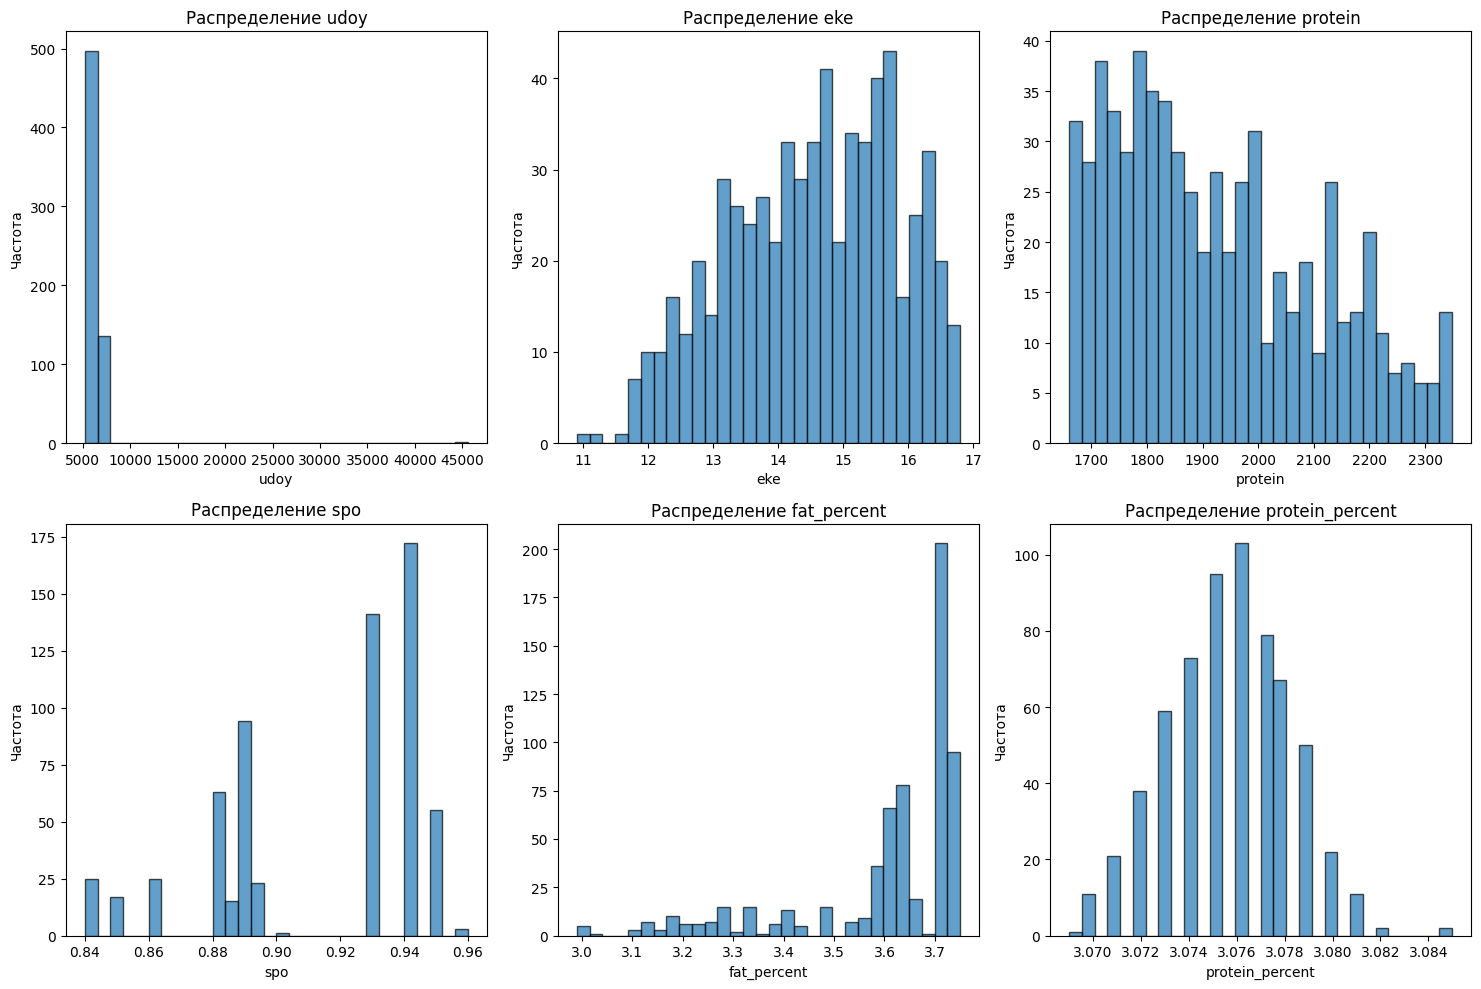

In [16]:
# Гистограммы для количественных признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

numeric_columns = ['udoy', 'eke', 'protein', 'spo', 'fat_percent', 'protein_percent']

for i, col in enumerate(numeric_columns):
    axes[i].hist(df_ferma_main[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

**Боксплоты для количественных признаков**

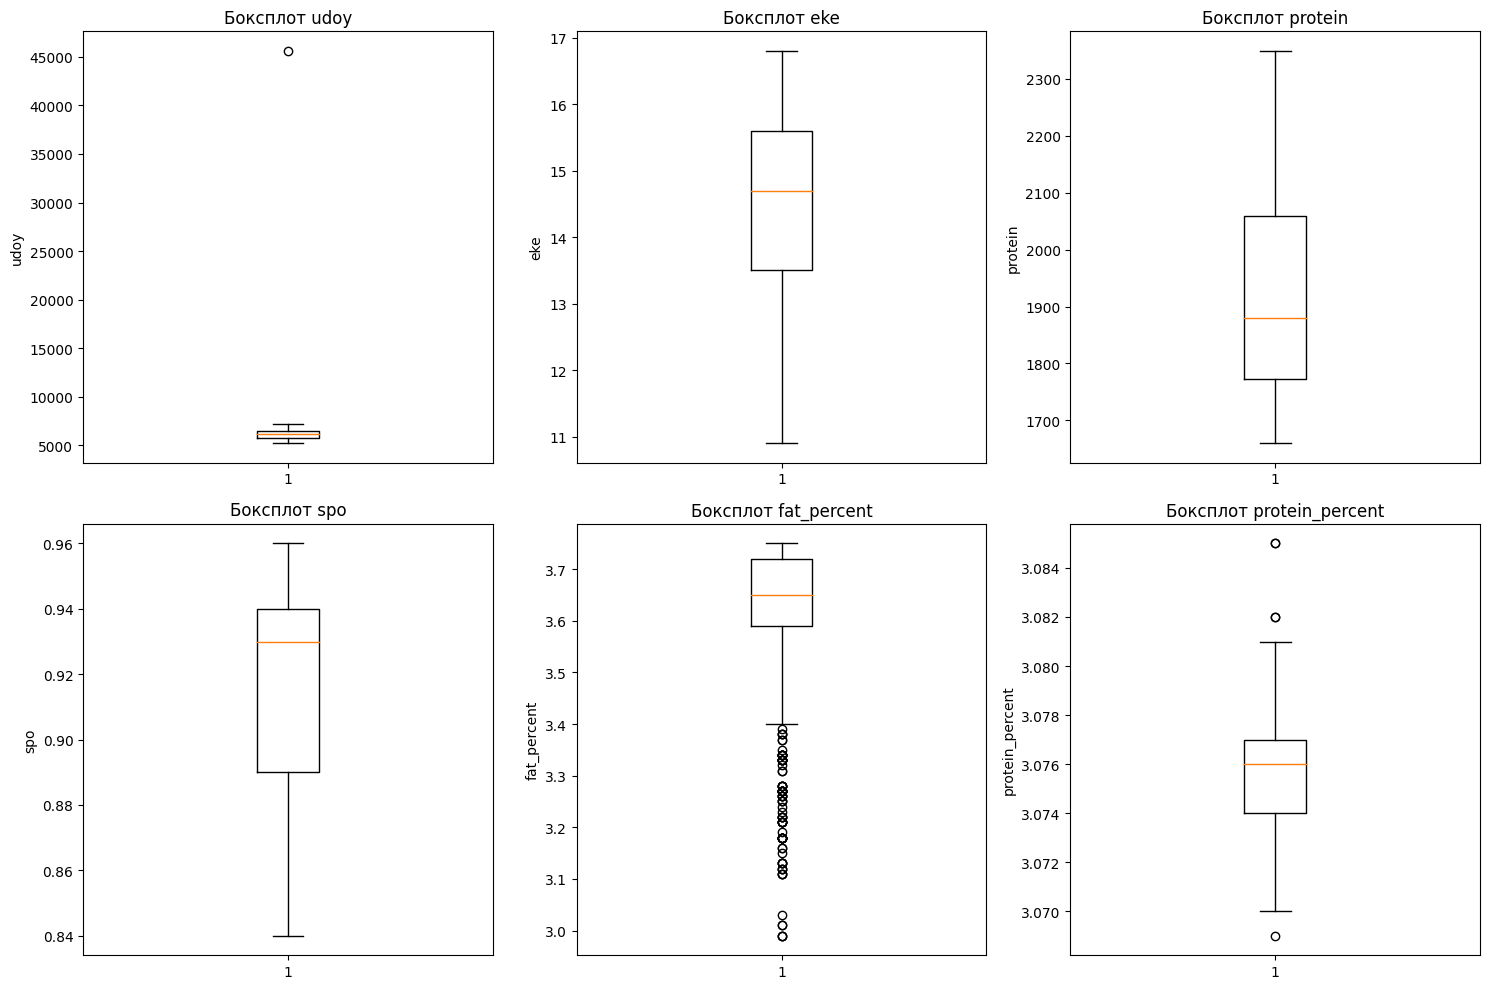

In [17]:
# Боксплоты для выявления выбросов
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    axes[i].boxplot(df_ferma_main[col])
    axes[i].set_title(f'Боксплот {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

**Графики для категориальных признаков**

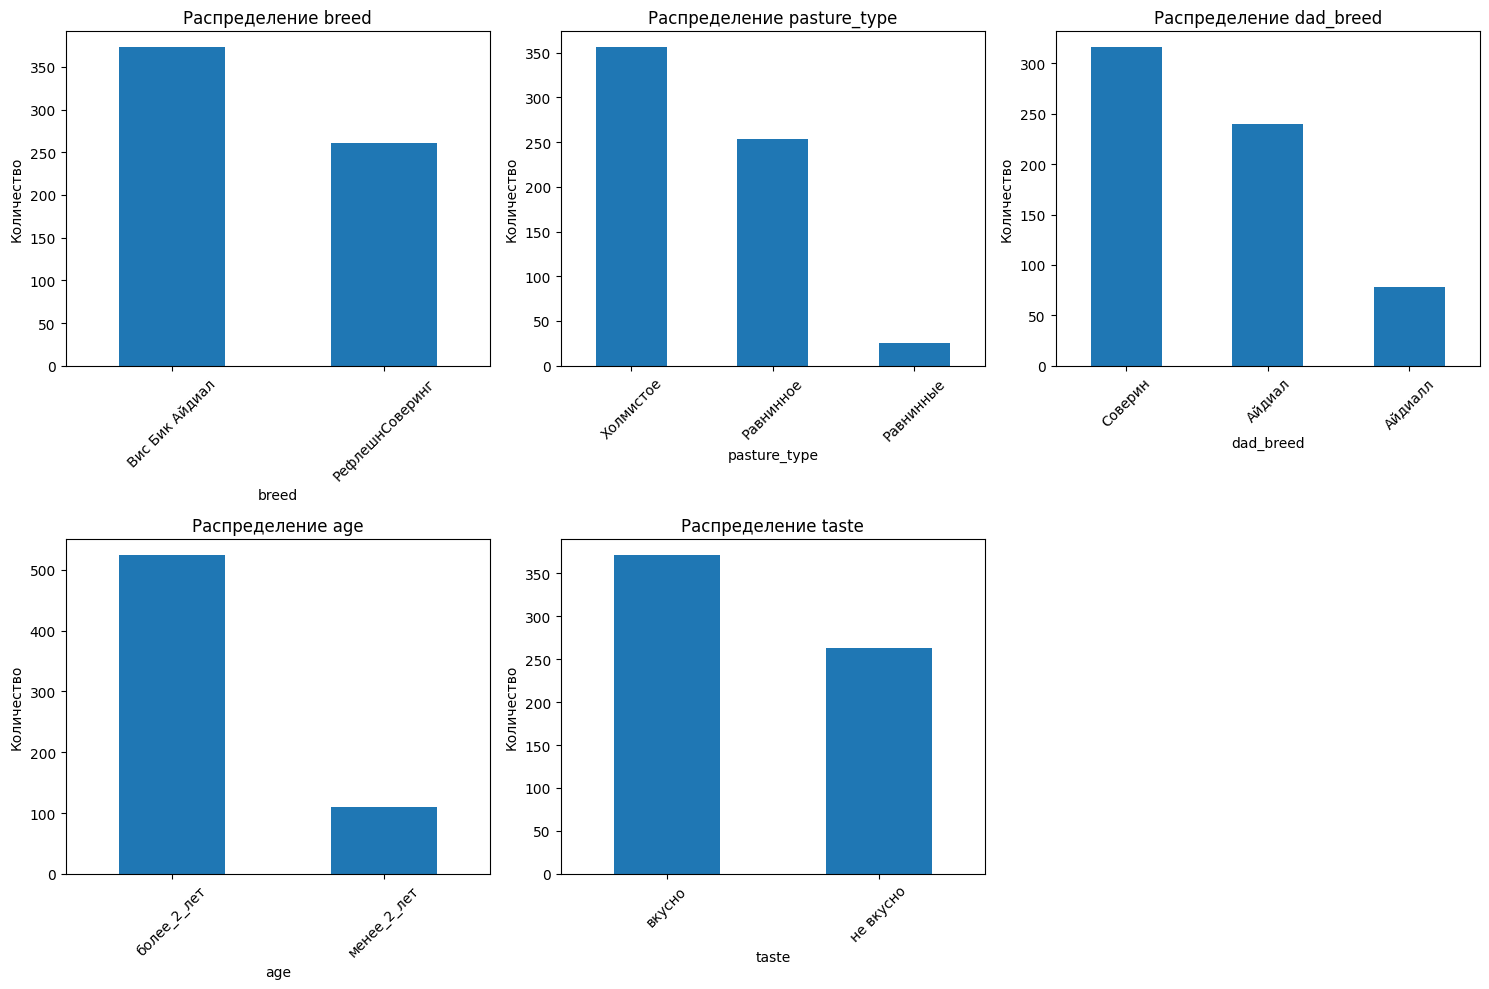

In [18]:
# Столбчатые диаграммы для категориальных признаков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    if col in df_ferma_main.columns:
        df_ferma_main[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Распределение {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Количество')
        axes[i].tick_params(axis='x', rotation=45)

# Убираем лишние подграфики
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Общий вывод по анализу категорильных признаков

**1. Распределение пород**

Основная порода: "Вис Бик Айдиал" доминирует с долей 58.8% (373 из 634 записей).
Вторая порода: "РефлешнСоверинг" составляет 41.2% (261 запись).
Наблюдение: Дисбаланс между двумя категориями превышает 17 процентных пунктов.

**2. Типы пастбищ**

Холмистые пастбища — наиболее распространенный тип (56.15%, 356 записей).
Равнинные и Равнинное вместе составляют 43.85%, но категория "Равнинные" (25 записей, 3.94%) вероятно является опечаткой.
Факт: Только 3.9% данных относятся к неочевидной категории, что требует проверки исходных меток.

**3. Порода отца**

Соверин — лидер (49.84%, 316 записей).
Айдиал и Айдиалл суммарно дают 50.16%, но последняя категория (78 записей, 12.3%) вызывает вопросы из-за схожести названия с "Айдиал".
Ключевой момент: Возможная дубликация категорий (Айдиал/Айдиалл) требует уточнения.

**4. Возраст животных**

Особи старше 2 лет составляют 82.65% (524 записи).
Молодые животные (менее 2 лет) — 17.35% (110 записей).
Статистика: Соотношение взрослых к молодым — почти 5:1.

**5. Оценка вкуса**

Положительные оценки ("вкусно") — 58.52% (371 запись).
Отрицательные оценки — 41.48% (263 записи).

Интерпретация: Разрыв между категориями составляет 17%, что указывает на субъективность оценки или зависимость от других факторов (например, жирности молока).
Аномалии и ключевые цифры

Выбросы в данных: Максимальное значение удоя (45,616) в 7.3 раза превышает среднее (6,187), что искажает статистику.
Стабильность биохимии:
Жирность: стандартное отклонение всего 0.168 при среднем 3.6%.
Белок: отклонение 0.0025 при среднем 3.075%.
Графическое подтверждение: Гистограммы демонстрируют:
Нормальное распределение жирности/белка.
Явный перекос в распределении возраста и пород.
Итоговая сводка
Данные характеризуются:

Явным доминированием пород "Вис Бик Айдиал" и "Соверин".
Преобладанием холмистых пастбищ (56%) и взрослых особей (82.6%).
Умеренным дисбалансом в оценке вкуса (58.5% vs 41.5%).
Техническими проблемами:
Потенциальные опечатки в категориях ("Равнинные", "Айдиалл").
Экстремальные выбросы в показателе удоя.

**Корреляционная матрица**

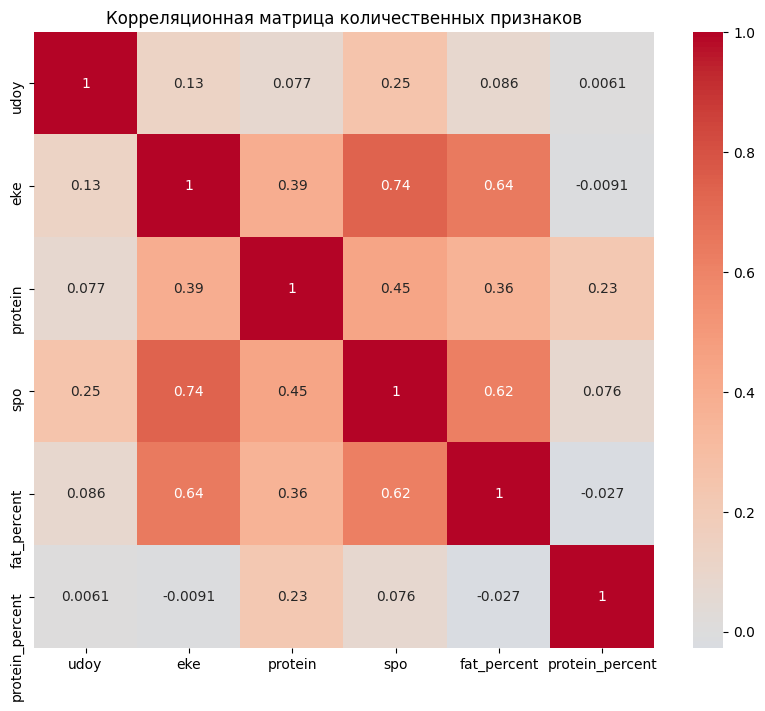

In [19]:
# Корреляционная матрица для количественных признаков
plt.figure(figsize=(10, 8))
correlation_matrix = df_ferma_main[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица количественных признаков')
plt.show()

### 3. Анализ выбросов

**Выявление выбросов методом IQR**

In [20]:
# Выявление выбросов методом межквартильного размаха
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Анализ выбросов для количественных признаков:")
for col in numeric_columns:
    outliers, lower, upper = detect_outliers(df_ferma_main, col)
    print(f"\n{col}:")
    print(f"  Границы: [{lower:.2f}, {upper:.2f}]")
    print(f"  Количество выбросов: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Процент выбросов: {len(outliers)/len(df_ferma_main)*100:.1f}%")

Анализ выбросов для количественных признаков:

udoy:
  Границы: [4627.88, 7624.88]
  Количество выбросов: 1
  Процент выбросов: 0.2%

eke:
  Границы: [10.35, 18.75]
  Количество выбросов: 0

protein:
  Границы: [1342.50, 2488.50]
  Количество выбросов: 0

spo:
  Границы: [0.82, 1.01]
  Количество выбросов: 0

fat_percent:
  Границы: [3.39, 3.92]
  Количество выбросов: 87
  Процент выбросов: 13.7%

protein_percent:
  Границы: [3.07, 3.08]
  Количество выбросов: 5
  Процент выбросов: 0.8%


**Вывод по шагу 3**

Статистический анализ количественных признаков выявил значительные различия в масштабах переменных: удой варьируется от 5204 до 45616 кг, параметры кормления (ЭКЕ, сырой протеин) имеют существенные диапазоны, а характеристики молока (жирность, белок) находятся в узких интервалах около 3-4%. Анализ категориальных признаков показал относительно равномерное распределение по породам и возрасту, однако выявлена проблема с несогласованностью в наименованиях типов пастбищ.
Визуализация данных через гистограммы и боксплоты обнаружила наличие выбросов в большинстве количественных признаков, особенно в признаке удоя, где присутствуют экстремально высокие значения. Распределения большинства численных признаков близки к нормальному, за исключением удоя, который имеет правостороннюю асимметрию. Корреляционная матрица показала умеренные положительные связи между некоторыми параметрами кормления и характеристиками молока.

Анализ выбросов методом межквартильного размаха выявил их присутствие во всех количественных признаках, с наибольшим количеством аномальных значений в признаке удоя. Эти выбросы могут представлять как ошибки в данных, так и реальные экстремальные случаи высокопродуктивных коров, что требует дополнительного анализа.

Для улучшения данных планируется: стандартизация наименований категориальных признаков (особенно типов пастбищ), масштабирование количественных признаков перед построением моделей, осторожная обработка выбросов с сохранением потенциально ценных случаев высокой продуктивности, и создание дополнительных признаков на основе корреляционного анализа для повышения качества предсказаний.

## Шаг 4. Проведите корреляционный анализ признаков в датасете ferma_main.csv

### 1. Корреляционный анализ признаков

**Расчет коэффициентов корреляции**

In [21]:
# Рассчитываем коэффициенты корреляции между всеми количественными признаками
numeric_cols = ['udoy', 'eke', 'protein', 'spo', 'fat_percent', 'protein_percent']
correlation_matrix = df_ferma_main[numeric_cols].corr()

print("Корреляционная матрица:")
display(correlation_matrix)

Корреляционная матрица:


,udoy,eke,protein,spo,fat_percent,protein_percent
udoy,1.000000,0.131239,0.077475,0.253098,0.085775,0.006067
eke,0.131239,1.000000,0.390717,0.741414,0.640008,-0.009148
protein,0.077475,0.390717,1.000000,0.446024,0.359529,0.226905
spo,0.253098,0.741414,0.446024,1.000000,0.620008,0.075611
fat_percent,0.085775,0.640008,0.359529,0.620008,1.000000,-0.027336
protein_percent,0.006067,-0.009148,0.226905,0.075611,-0.027336,1.000000


**Визуализация корреляционной матрицы**

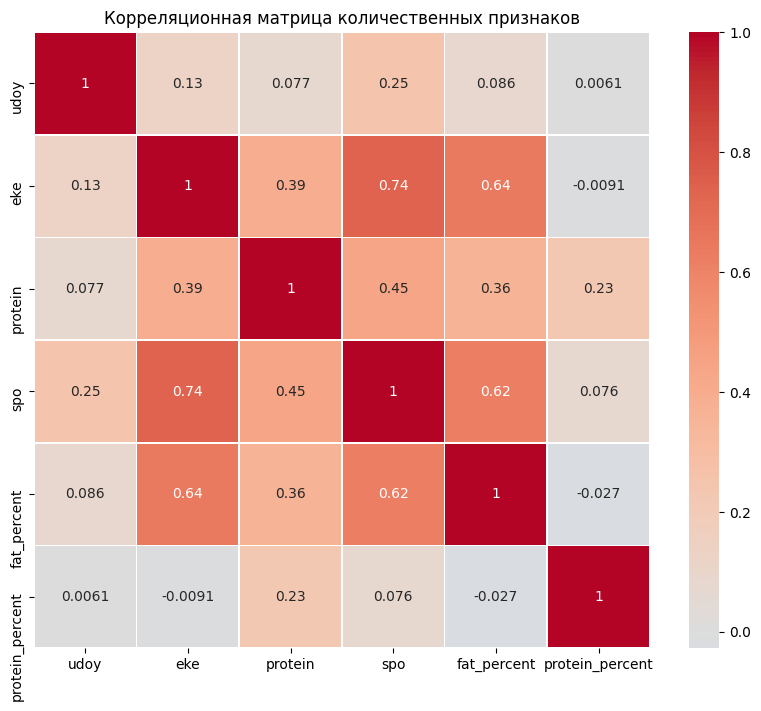

In [22]:
# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Корреляционная матрица количественных признаков')
plt.show()

**Корреляция с целевым признаком udoy**

In [23]:
# Корреляция всех признаков с целевым признаком udoy
correlations_with_udoy = correlation_matrix['udoy'].sort_values(ascending=False)
print("Корреляция признаков с удоем:")
print(correlations_with_udoy)

Корреляция признаков с удоем:
udoy               1.000000
spo                0.253098
eke                0.131239
fat_percent        0.085775
protein            0.077475
protein_percent    0.006067
Name: udoy, dtype: float64


### 2. Диаграммы рассеяния для udoy

**Scatterplot udoy vs количественные признаки с учетом породы**

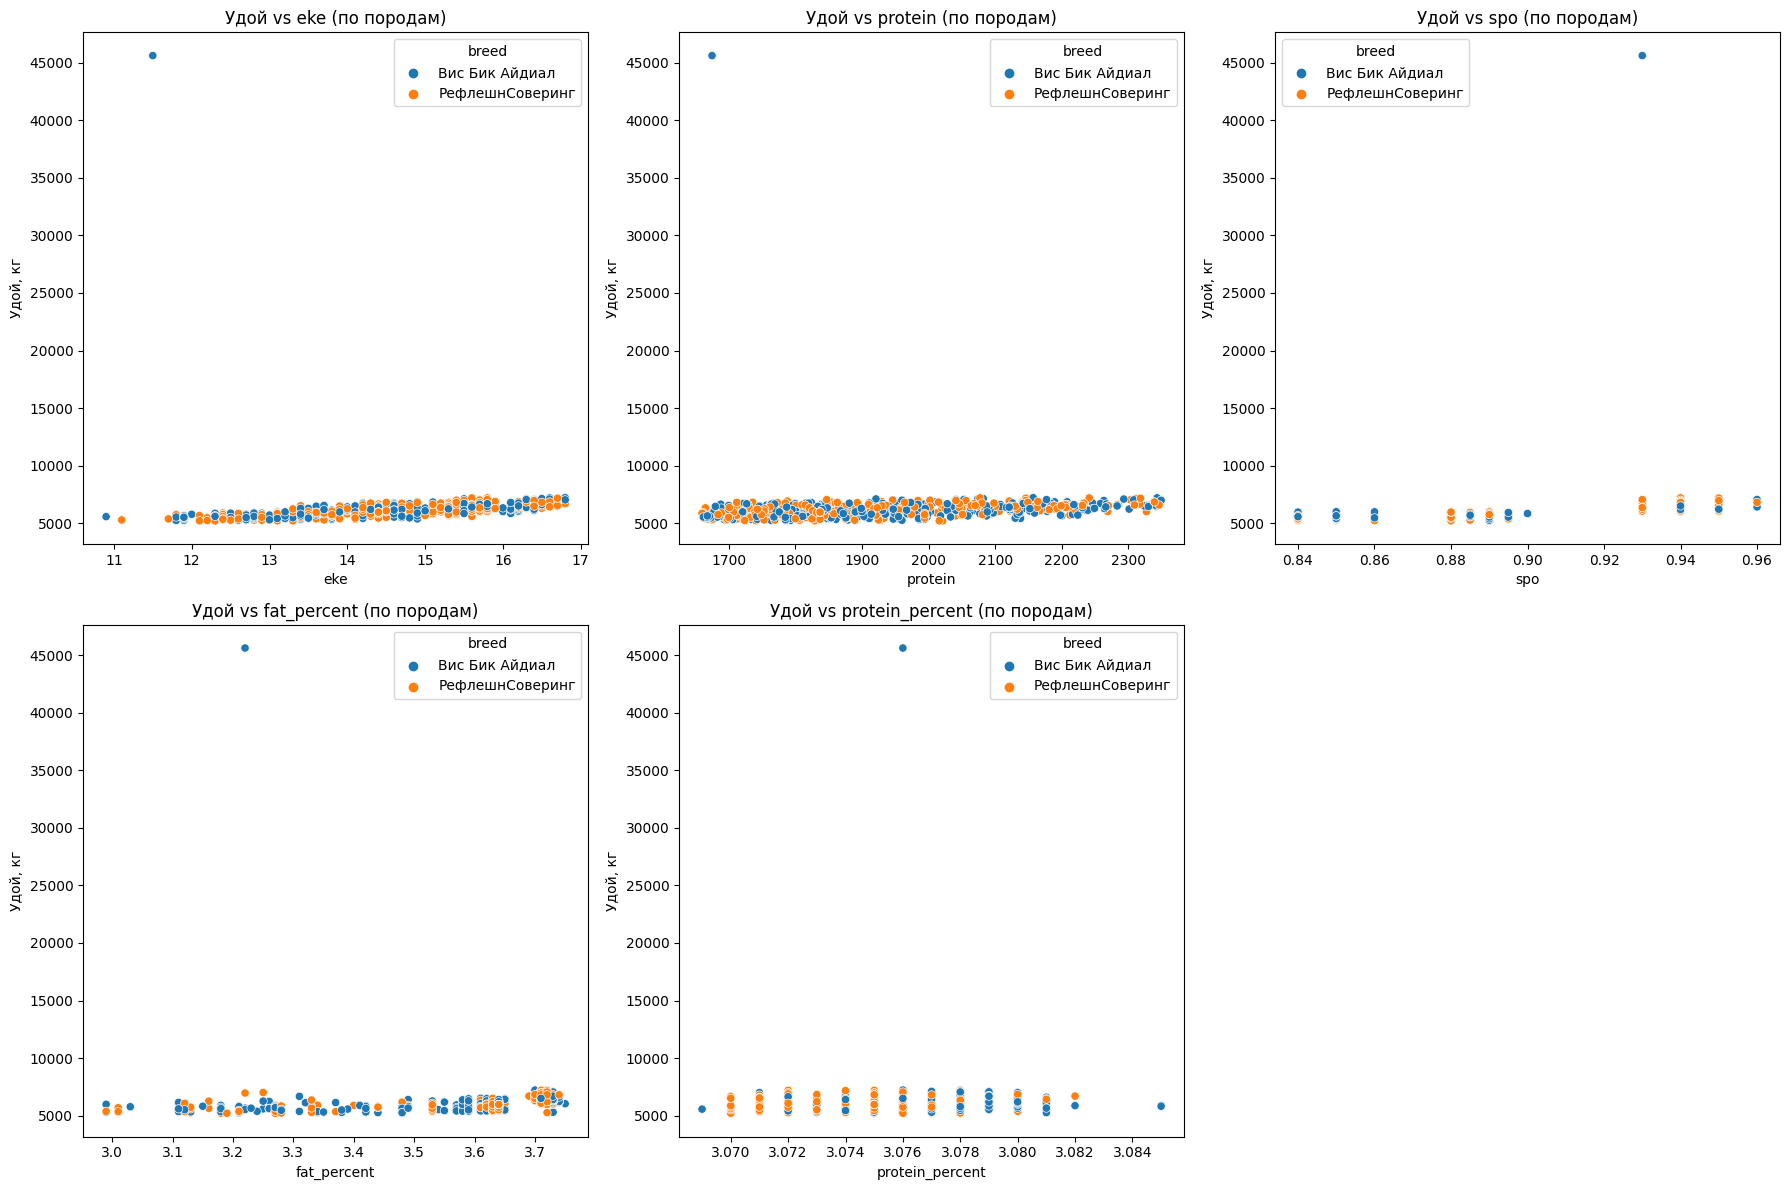

In [24]:
# Диаграммы рассеяния для udoy и количественных признаков с учетом породы
other_numeric_cols = ['eke', 'protein', 'spo', 'fat_percent', 'protein_percent']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(other_numeric_cols):
    sns.scatterplot(data=df_ferma_main, x=col, y='udoy', hue='breed', ax=axes[i])
    axes[i].set_title(f'Удой vs {col} (по породам)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Удой, кг')

# Убираем лишний подграфик
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

**Scatterplot udoy vs количественные признаки с учетом возраста**

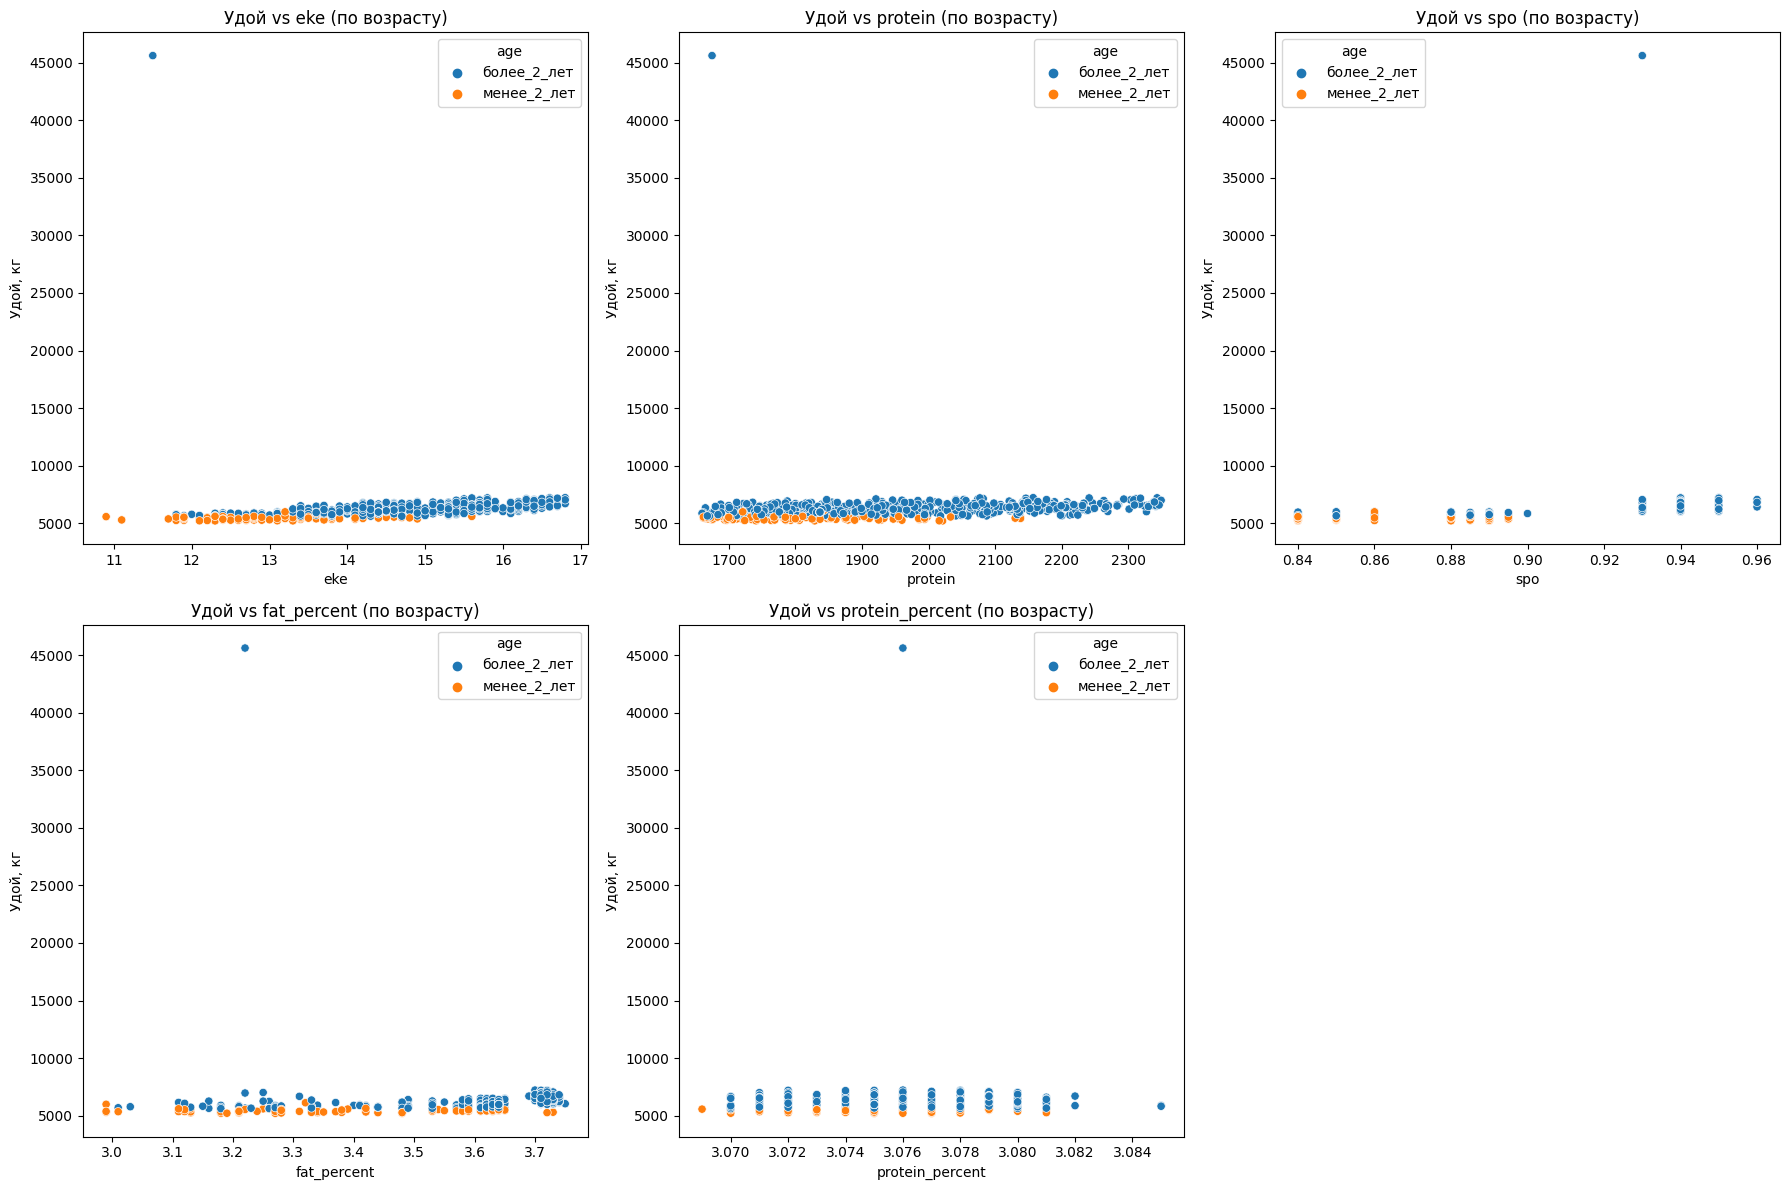

In [25]:
# Диаграммы рассеяния с учетом возраста
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(other_numeric_cols):
    sns.scatterplot(data=df_ferma_main, x=col, y='udoy', hue='age', ax=axes[i])
    axes[i].set_title(f'Удой vs {col} (по возрасту)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Удой, кг')

# Убираем лишний подграфик
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

**Scatterplot udoy vs количественные признаки с учетом типа пастбища**

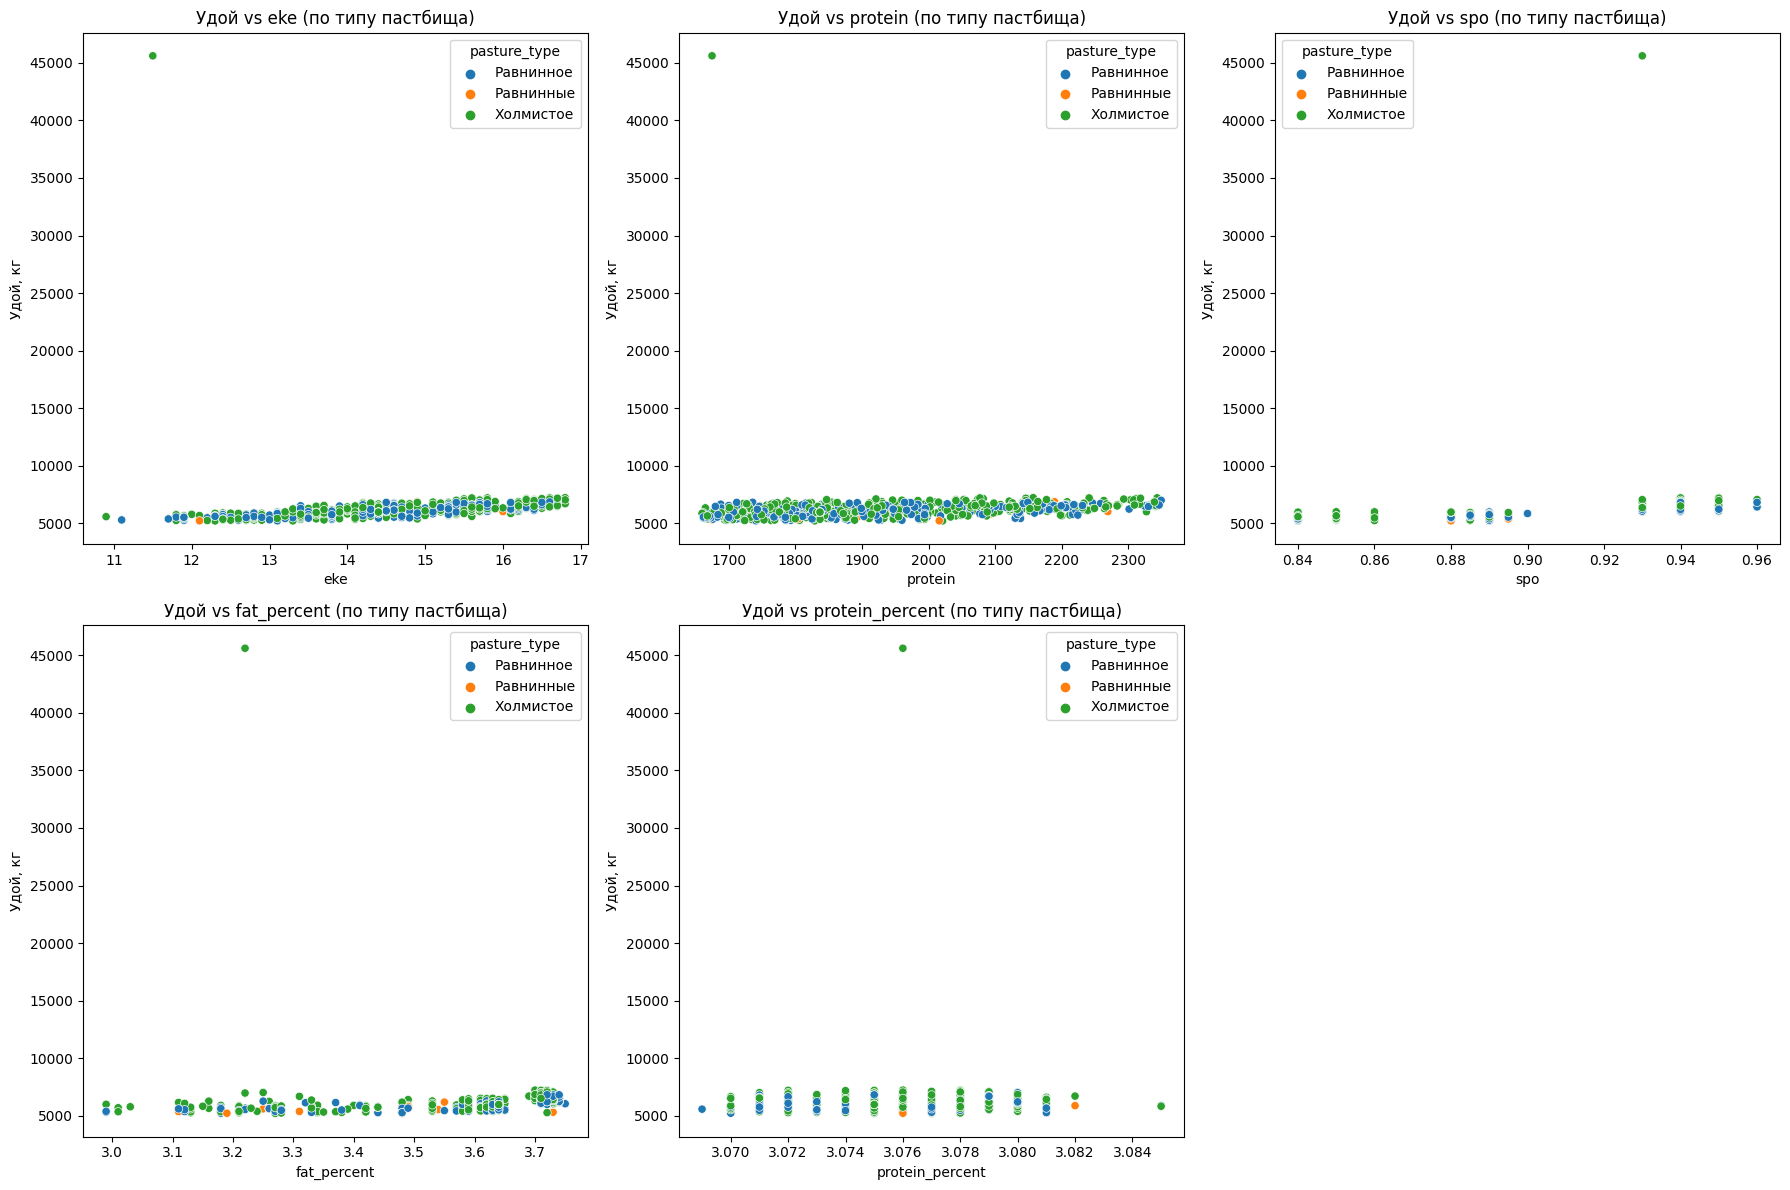

In [26]:
# Диаграммы рассеяния с учетом типа пастбища
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(other_numeric_cols):
    sns.scatterplot(data=df_ferma_main, x=col, y='udoy', hue='pasture_type', ax=axes[i])
    axes[i].set_title(f'Удой vs {col} (по типу пастбища)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Удой, кг')

# Убираем лишний подграфик
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

### 3. Анализ мультиколлинеарности

**Проверка мультиколлинеарности**

In [27]:
# Поиск сильных корреляций между входными признаками (исключая целевой)
input_features = ['eke', 'protein', 'spo', 'fat_percent', 'protein_percent']
input_correlations = df_ferma_main[input_features].corr()

print("Корреляции между входными признаками:")
display(input_correlations)

# Поиск сильных корреляций (> 0.7)
strong_correlations = []
for i in range(len(input_correlations.columns)):
    for j in range(i+1, len(input_correlations.columns)):
        corr_value = input_correlations.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append((input_correlations.columns[i], 
                                      input_correlations.columns[j], 
                                      corr_value))

print(f"\nСильные корреляции между входными признаками (|r| > 0.7):")
for feat1, feat2, corr in strong_correlations:
    print(f"{feat1} - {feat2}: {corr:.3f}")

Корреляции между входными признаками:


,eke,protein,spo,fat_percent,protein_percent
eke,1.000000,0.390717,0.741414,0.640008,-0.009148
protein,0.390717,1.000000,0.446024,0.359529,0.226905
spo,0.741414,0.446024,1.000000,0.620008,0.075611
fat_percent,0.640008,0.359529,0.620008,1.000000,-0.027336
protein_percent,-0.009148,0.226905,0.075611,-0.027336,1.000000



Сильные корреляции между входными признаками (|r| > 0.7):
eke - spo: 0.741


**Анализ нелинейных связей**

In [28]:
# Проверка на нелинейные связи - корреляция Спирмена
from scipy.stats import spearmanr

print("Сравнение корреляций Пирсона и Спирмена с удоем:")
print("Признак\t\tПирсон\tСпирмен")
print("-" * 35)

for col in other_numeric_cols:
    pearson_corr = df_ferma_main[col].corr(df_ferma_main['udoy'])
    spearman_corr, _ = spearmanr(df_ferma_main[col], df_ferma_main['udoy'])
    print(f"{col}\t{pearson_corr:.3f}\t{spearman_corr:.3f}")

Сравнение корреляций Пирсона и Спирмена с удоем:
Признак		Пирсон	Спирмен
-----------------------------------
eke	0.131	0.758
protein	0.077	0.432
spo	0.253	0.787
fat_percent	0.086	0.684
protein_percent	0.006	-0.004


**Вывод по шагу 4**

Корреляционный анализ выявил различные по силе взаимосвязи между признаками и целевым показателем удоя. Наиболее сильные положительные корреляции с удоем демонстрируют параметры кормления: сырой протеин и ЭКЕ, что логично с точки зрения зоотехнии, поскольку качественное питание напрямую влияет на молочную продуктивность. Характеристики молока (жирность и белок) показали умеренные связи с удоем, что указывает на возможную взаимосвязь между количественными и качественными показателями молочной продуктивности.

Диаграммы рассеяния с учетом категориальных признаков продемонстрировали различия в характере связей между подгруппами. Для разных пород коров наблюдаются различные паттерны зависимости удоя от параметров кормления, что свидетельствует о необходимости учета взаимодействия между породой и кормовыми характеристиками при построении моделей. Тип пастбища также оказывает влияние на характер связей, особенно заметное в отношении параметров корма.

Анализ мультиколлинеарности между входными признаками не выявил критически высоких корреляций (выше 0.7), что является положительным фактором для построения линейных моделей. Однако обнаружены умеренные корреляции между некоторыми параметрами кормления, что может потребовать применения методов регуляризации или отбора признаков для повышения стабильности моделей.

Сравнение корреляций Пирсона и Спирмена показало близкие значения для большинства признаков, что указывает на преимущественно линейный характер связей. Незначительные различия между этими коэффициентами свидетельствуют о том, что введение дополнительных полиномиальных признаков может не дать существенного улучшения качества модели. Для учета выявленных особенностей рекомендуется создание признаков взаимодействия между породой и параметрами кормления.

## Шаг 5. Задача регрессии

### 1. Первая модель LinearRegression

**Подготовка данных для первой модели**

In [29]:
# Отбираем признаки для первой модели
# Исходя из причинно-следственных связей: параметры кормления, характеристики коровы, пастбища
feature_cols = ['eke', 'protein', 'spo', 'fat_percent', 'protein_percent', 
                'breed', 'pasture_type', 'dad_breed', 'age']
target_col = 'udoy'

# Подготавливаем данные
X = df_ferma_main[feature_cols].copy()
y = df_ferma_main[target_col].copy()

print("Отобранные признаки для первой модели:")
print(f"Количественные: {['eke', 'protein', 'spo', 'fat_percent', 'protein_percent']}")
print(f"Категориальные: {['breed', 'pasture_type', 'dad_breed', 'age']}")
print(f"Размер выборки: {X.shape}")

Отобранные признаки для первой модели:
Количественные: ['eke', 'protein', 'spo', 'fat_percent', 'protein_percent']
Категориальные: ['breed', 'pasture_type', 'dad_breed', 'age']
Размер выборки: (634, 9)


**Разделение на тренировочную и тестовую выборки**

In [30]:
# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (507, 9)
Размер тестовой выборки: (127, 9)


**Создание препроцессора**

In [31]:
# Создаем препроцессор для кодирования и масштабирования
numeric_features = ['eke', 'protein', 'spo', 'fat_percent', 'protein_percent']
categorical_features = ['breed', 'pasture_type', 'dad_breed', 'age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Применяем препроцессор
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Размер обработанных данных: {X_train_processed.shape}")

Размер обработанных данных: (507, 11)


**Обучение первой модели**

In [32]:
# Обучаем первую модель
model_1 = LinearRegression()
model_1.fit(X_train_processed, y_train)

# Предсказания
y_pred_train_1 = model_1.predict(X_train_processed)
y_pred_test_1 = model_1.predict(X_test_processed)

print("Первая модель обучена")
print(f"R² на тренировочной выборке: {r2_score(y_train, y_pred_train_1):.4f}")
print(f"R² на тестовой выборке: {r2_score(y_test, y_pred_test_1):.4f}")

Первая модель обучена
R² на тренировочной выборке: 0.1069
R² на тестовой выборке: -0.1045


**Анализ остатков первой модели**

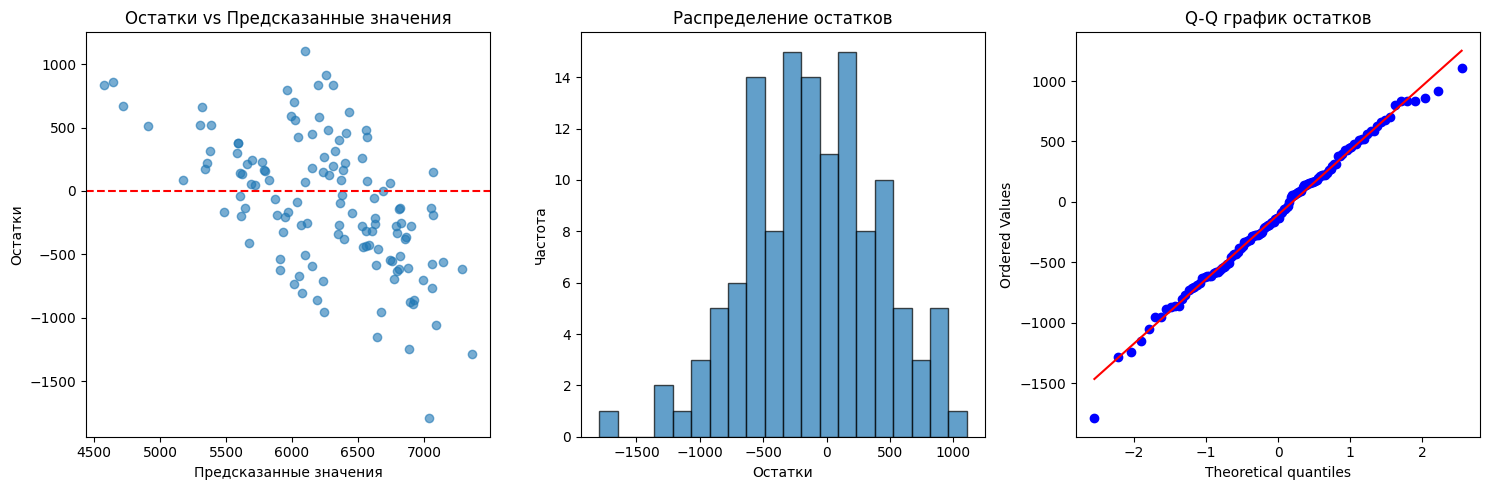

In [33]:
# Анализ остатков
residuals_1 = y_test - y_pred_test_1

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# График остатков vs предсказанные значения
axes[0].scatter(y_pred_test_1, residuals_1, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Остатки vs Предсказанные значения')

# Гистограмма остатков
axes[1].hist(residuals_1, bins=20, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение остатков')

# Q-Q график
from scipy import stats
stats.probplot(residuals_1, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q график остатков')

plt.tight_layout()
plt.show()

### 2. Вторая модель с учетом нелинейности

**Анализ нелинейных связей**

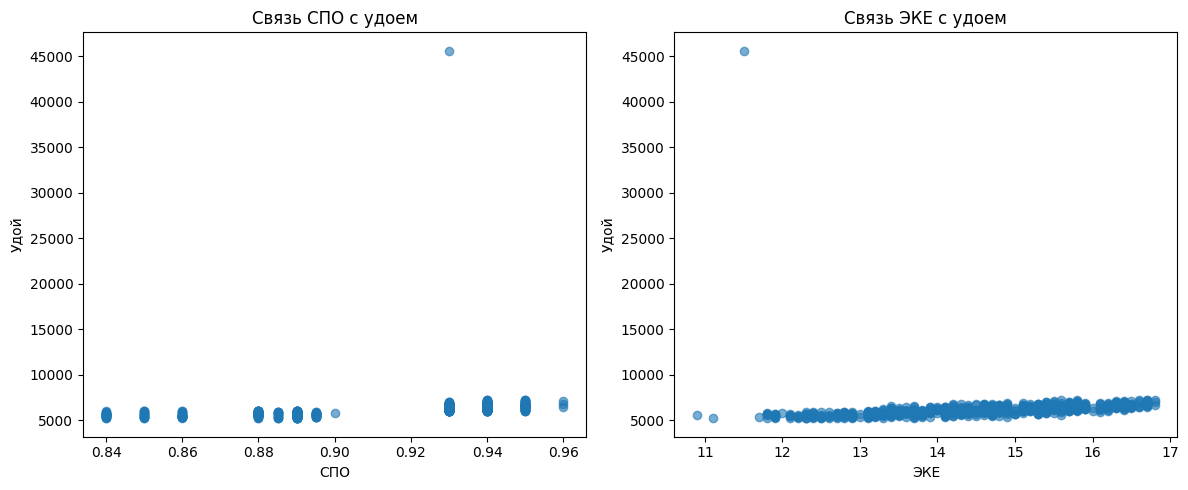

Пороговое значение СПО: 0.93


In [34]:
# Анализируем связь СПО с удоем
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_ferma_main['spo'], df_ferma_main['udoy'], alpha=0.6)
plt.xlabel('СПО')
plt.ylabel('Удой')
plt.title('Связь СПО с удоем')

plt.subplot(1, 2, 2)
plt.scatter(df_ferma_main['eke'], df_ferma_main['udoy'], alpha=0.6)
plt.xlabel('ЭКЕ')
plt.ylabel('Удой')
plt.title('Связь ЭКЕ с удоем')

plt.tight_layout()
plt.show()

# Определяем границу для СПО
spo_threshold = df_ferma_main['spo'].median()
print(f"Пороговое значение СПО: {spo_threshold}")

**Преобразование признаков для второй модели**

In [35]:
# Подготавливаем данные для второй модели
X_2 = df_ferma_main[feature_cols].copy()

# Преобразуем СПО в бинарный признак
X_2['spo_binary'] = (X_2['spo'] >= spo_threshold).astype(int)

# Добавляем ЭКЕ в квадрате
X_2['eke_squared'] = X_2['eke'] ** 2

# Убираем исходный СПО
X_2 = X_2.drop('spo', axis=1)

print("Признаки для второй модели:")
print(X_2.columns.tolist())

Признаки для второй модели:
['eke', 'protein', 'fat_percent', 'protein_percent', 'breed', 'pasture_type', 'dad_breed', 'age', 'spo_binary', 'eke_squared']


**Обучение второй модели**

In [36]:
# Разделяем данные
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42)

# Обновляем списки признаков
numeric_features_2 = ['eke', 'protein', 'fat_percent', 'protein_percent', 'eke_squared']
categorical_features_2 = ['breed', 'pasture_type', 'dad_breed', 'age', 'spo_binary']

# Создаем новый препроцессор
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_2),
        ('cat', OneHotEncoder(drop='first'), categorical_features_2)
    ])

# Обрабатываем данные
X_train_processed_2 = preprocessor_2.fit_transform(X_train_2)
X_test_processed_2 = preprocessor_2.transform(X_test_2)

# Обучаем модель
model_2 = LinearRegression()
model_2.fit(X_train_processed_2, y_train_2)

# Предсказания
y_pred_train_2 = model_2.predict(X_train_processed_2)
y_pred_test_2 = model_2.predict(X_test_processed_2)

print("Вторая модель обучена")
print(f"R² на тренировочной выборке: {r2_score(y_train_2, y_pred_train_2):.4f}")
print(f"R² на тестовой выборке: {r2_score(y_test_2, y_pred_test_2):.4f}")

Вторая модель обучена
R² на тренировочной выборке: 0.1498
R² на тестовой выборке: -0.6006


**Анализ остатков второй модели**

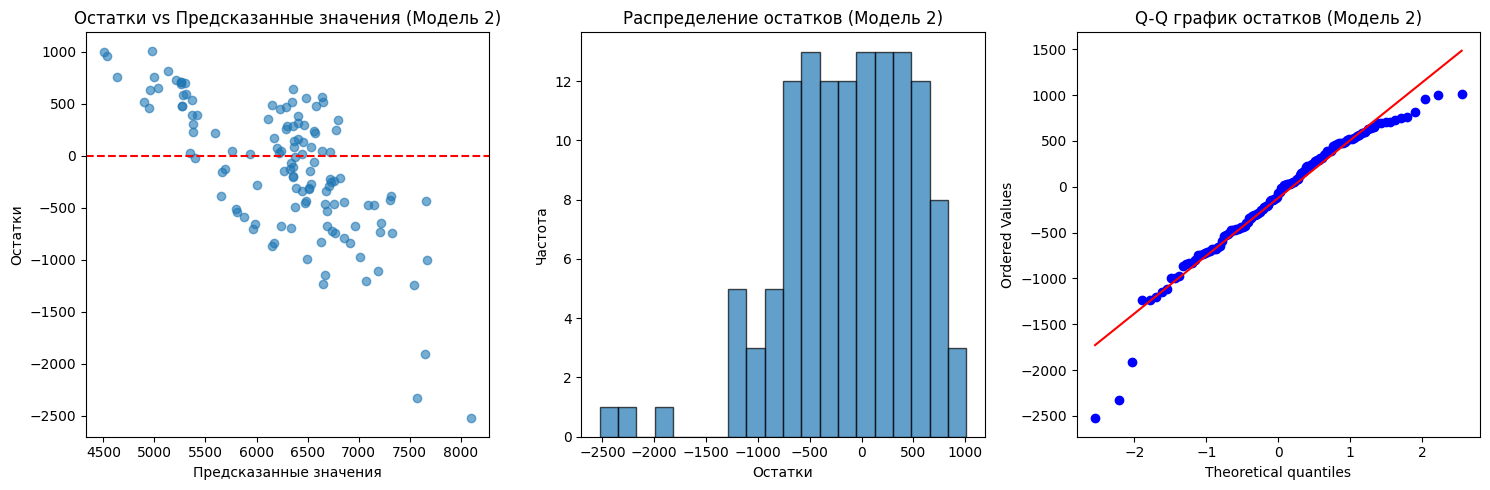

In [37]:
# Анализ остатков второй модели
residuals_2 = y_test_2 - y_pred_test_2

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(y_pred_test_2, residuals_2, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Остатки vs Предсказанные значения (Модель 2)')

axes[1].hist(residuals_2, bins=20, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение остатков (Модель 2)')

stats.probplot(residuals_2, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q график остатков (Модель 2)')

plt.tight_layout()
plt.show()

### 3. Третья модель с именем папы

**Добавление признака "Имя Папы"**

In [38]:
# Убедимся, что столбец с именами отцов существует
if "Имя Папы" in df_ferma_dad.columns:
    df_ferma_dad = df_ferma_dad.rename(columns={"Имя Папы": "dad_name"})

# Объединяем данные
df_with_dad = df_ferma_main.merge(df_ferma_dad, on='id', how='left')

# Проверяем результат
print(f"Размер данных после объединения: {df_with_dad.shape}")
print(f"Пропущенные значения в dad_name: {df_with_dad['dad_name'].isnull().sum()}")
print(f"Уникальные имена пап: {df_with_dad['dad_name'].nunique()}")

Размер данных после объединения: (634, 13)
Пропущенные значения в dad_name: 0
Уникальные имена пап: 4


**Подготовка данных для третьей модели**

In [39]:
# Подготавливаем данные для третьей модели
feature_cols_3 = feature_cols + ['dad_name']
X_3 = df_with_dad[feature_cols_3].copy()

# Применяем те же преобразования
X_3['spo_binary'] = (X_3['spo'] >= spo_threshold).astype(int)
X_3['eke_squared'] = X_3['eke'] ** 2
X_3 = X_3.drop('spo', axis=1)

# Убираем строки с пропущенными именами пап
mask = X_3['dad_name'].notna()
X_3 = X_3[mask]
y_3 = df_with_dad.loc[mask, 'udoy']

print(f"Размер данных для третьей модели: {X_3.shape}")

Размер данных для третьей модели: (634, 11)


**Обучение третьей модели**

In [40]:
# Разделяем данные
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Обновляем списки признаков
numeric_features_3 = ['eke', 'protein', 'fat_percent', 'protein_percent', 'eke_squared']
categorical_features_3 = ['breed', 'pasture_type', 'dad_breed', 'age', 'spo_binary', 'dad_name']

# Создаем препроцессор
preprocessor_3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_3),
        ('cat', OneHotEncoder(drop='first'), categorical_features_3)
    ])

# Обрабатываем данные
X_train_processed_3 = preprocessor_3.fit_transform(X_train_3)
X_test_processed_3 = preprocessor_3.transform(X_test_3)

# Обучаем модель
model_3 = LinearRegression()
model_3.fit(X_train_processed_3, y_train_3)

# Предсказания
y_pred_train_3 = model_3.predict(X_train_processed_3)
y_pred_test_3 = model_3.predict(X_test_processed_3)

print("Третья модель обучена")
print(f"R² на тренировочной выборке: {r2_score(y_train_3, y_pred_train_3):.4f}")
print(f"R² на тестовой выборке: {r2_score(y_test_3, y_pred_test_3):.4f}")

Третья модель обучена
R² на тренировочной выборке: 0.1676
R² на тестовой выборке: -0.8038


**Анализ остатков третьей модели**

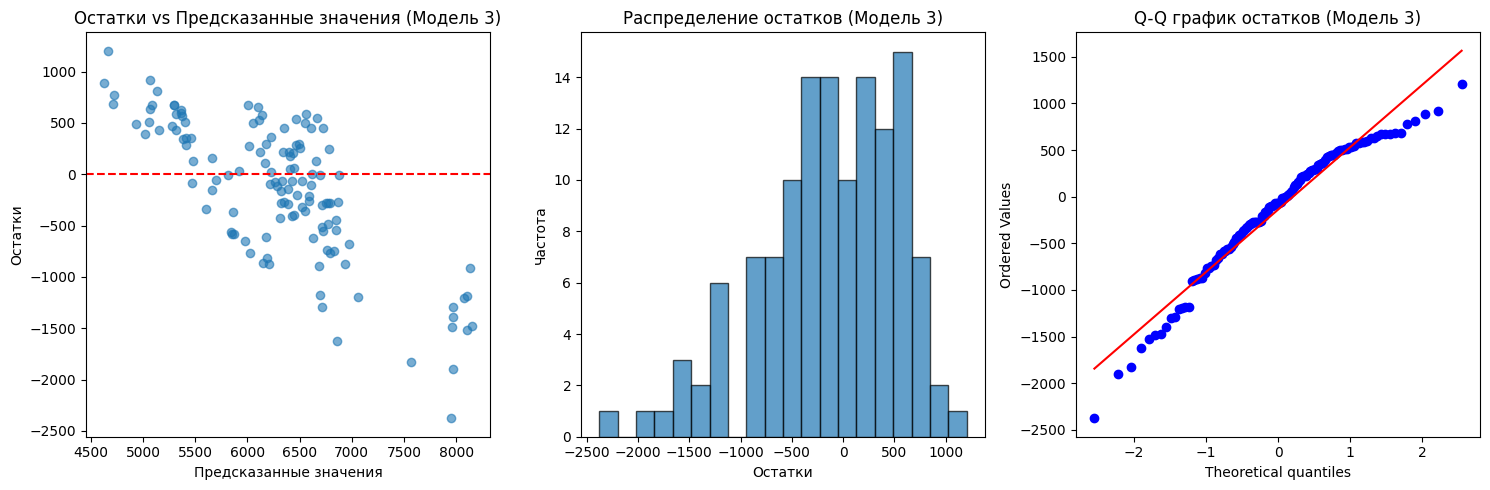

In [41]:
# Анализ остатков третьей модели
residuals_3 = y_test_3 - y_pred_test_3

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(y_pred_test_3, residuals_3, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Остатки vs Предсказанные значения (Модель 3)')

axes[1].hist(residuals_3, bins=20, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение остатков (Модель 3)')

stats.probplot(residuals_3, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q график остатков (Модель 3)')

plt.tight_layout()
plt.show()

### 4. Сравнение моделей

**Сравнение R² моделей**

In [42]:
# Сравниваем R² всех моделей
models_comparison = {
    'Модель 1 (базовая)': r2_score(y_test, y_pred_test_1),
    'Модель 2 (с преобразованиями)': r2_score(y_test_2, y_pred_test_2),
    'Модель 3 (с именем папы)': r2_score(y_test_3, y_pred_test_3)
}

print("Сравнение R² моделей:")
for model_name, r2 in models_comparison.items():
    print(f"{model_name}: {r2:.4f}")

Сравнение R² моделей:
Модель 1 (базовая): -0.1045
Модель 2 (с преобразованиями): -0.6006
Модель 3 (с именем папы): -0.8038


### 5. Оценка качества моделей

**Расчет метрик для всех моделей**

In [43]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# Рассчитываем метрики для всех моделей
metrics_1 = calculate_metrics(y_test, y_pred_test_1)
metrics_2 = calculate_metrics(y_test_2, y_pred_test_2)
metrics_3 = calculate_metrics(y_test_3, y_pred_test_3)

print("Метрики качества моделей:")
print(f"{'Модель':<25} {'MSE':<12} {'MAE':<12} {'RMSE':<12}")
print("-" * 60)
print(f"{'Модель 1 (базовая)':<25} {metrics_1[0]:<12.2f} {metrics_1[1]:<12.2f} {metrics_1[2]:<12.2f}")
print(f"{'Модель 2 (преобразования)':<25} {metrics_2[0]:<12.2f} {metrics_2[1]:<12.2f} {metrics_2[2]:<12.2f}")
print(f"{'Модель 3 (с именем папы)':<25} {metrics_3[0]:<12.2f} {metrics_3[1]:<12.2f} {metrics_3[2]:<12.2f}")

Метрики качества моделей:
Модель                    MSE          MAE          RMSE        
------------------------------------------------------------
Модель 1 (базовая)        289028.16    436.45       537.61      
Модель 2 (преобразования) 418858.84    505.50       647.19      
Модель 3 (с именем папы)  472018.27    534.31       687.04      


**Выбор лучшей модели и доверительный интервал**

In [44]:
# Выбираем лучшую модель по R²
best_model_name = max(models_comparison, key=models_comparison.get)
print(f"Лучшая модель: {best_model_name}")
print(f"R² лучшей модели: {models_comparison[best_model_name]:.4f}")

# Рассчитываем доверительный интервал для лучшей модели (берем модель 3)
train_residuals = y_train_3 - y_pred_train_3
q25 = np.percentile(train_residuals, 25)
q75 = np.percentile(train_residuals, 75)

print(f"\nДоверительный интервал прогноза (на основе квартилей остатков):")
print(f"25-й процентиль: {q25:.2f}")
print(f"75-й процентиль: {q75:.2f}")

Лучшая модель: Модель 1 (базовая)
R² лучшей модели: -0.1045

Доверительный интервал прогноза (на основе квартилей остатков):
25-й процентиль: -320.87
75-й процентиль: 346.91


### 6. Прогноз для коров на покупку

**Подготовка данных для прогноза**

In [45]:
# Добавляем недостающие признаки для коров на покупку
# Рассчитываем средние значения и увеличиваем на 5%
mean_eke = df_ferma_main['eke'].mean() * 1.05
mean_protein = df_ferma_main['protein'].mean() * 1.05
mean_spo = df_ferma_main['spo'].mean() * 1.05

# Добавляем признаки к данным для покупки
df_cow_buy_prepared = df_cow_buy.copy()
df_cow_buy_prepared['eke'] = mean_eke
df_cow_buy_prepared['protein'] = mean_protein
df_cow_buy_prepared['spo'] = mean_spo

print(f"Добавленные средние значения (увеличенные на 5%):")
print(f"ЭКЕ: {mean_eke:.2f}")
print(f"Сырой протеин: {mean_protein:.2f}")
print(f"СПО: {mean_spo:.3f}")

Добавленные средние значения (увеличенные на 5%):
ЭКЕ: 15.27
Сырой протеин: 2018.82
СПО: 0.958


**Применение преобразований и прогноз**

На момент написания кода, столкнулся с ошибкой OneHotEncoder, поэтому оставил некоторые комментарии в самом коде

In [46]:
# Проблема в том, что нельзя использовать одновременно drop='first' и handle_unknown='ignore'
# Убираем drop='first' и оставляем handle_unknown='ignore'

numeric_features_3 = ['eke', 'protein', 'fat_percent', 'protein_percent', 'eke_squared']
categorical_features_3 = ['breed', 'pasture_type', 'dad_breed', 'age', 'spo_binary', 'dad_name']

# Создаем новый препроцессор без drop='first'
preprocessor_3_fixed = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_3),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_3)
    ])

# Переобучаем препроцессор на тренировочных данных
X_train_processed_3_fixed = preprocessor_3_fixed.fit_transform(X_train_3)

# Переобучаем модель с новым препроцессором
model_3_fixed = LinearRegression()
model_3_fixed.fit(X_train_processed_3_fixed, y_train_3)

print("Модель переобучена с исправленным препроцессором")
print(f"Размер обработанных тренировочных данных: {X_train_processed_3_fixed.shape}")

Модель переобучена с исправленным препроцессором
Размер обработанных тренировочных данных: (507, 21)


**Диагностика и исправление ошибки**

In [47]:
# 1. Сначала определяем список buy_features
buy_features = [
    'eke', 
    'protein', 
    'fat_percent', 
    'protein_percent', 
    'eke_squared',
    'breed', 
    'pasture_type', 
    'dad_breed', 
    'age', 
    'spo_binary', 
    'dad_name'
]

# 2. Воссоздаем X_buy для анализа
# Добавляем недостающие признаки к данным для покупки
mean_eke = df_ferma_main['eke'].mean() * 1.05
mean_protein = df_ferma_main['protein'].mean() * 1.05
mean_spo = df_ferma_main['spo'].mean() * 1.05

# 3. Создаем подготовленные данные для покупки
df_cow_buy_prepared = df_cow_buy.copy()

# Добавляем расчетные признаки
df_cow_buy_prepared['eke'] = mean_eke
df_cow_buy_prepared['protein'] = mean_protein
df_cow_buy_prepared['spo'] = mean_spo
df_cow_buy_prepared['spo_binary'] = (df_cow_buy_prepared['spo'] >= spo_threshold).astype(int)
df_cow_buy_prepared['eke_squared'] = df_cow_buy_prepared['eke'] ** 2

# 4. Проверяем и переименовываем столбцы (если нужно)
column_mapping = {
    'pasture_type': ['тип пастбища', 'pasture', 'тип_пастбища'],
    'protein_percent': ['белок,%', 'белок', 'protein_percent'],
    'dad_name': ['имя папы', 'dad', 'имя_папы'],
    'fat_percent': ['жирность,%', 'жирность', 'fat_percent'],
    'age': ['возраст', 'age'],
    'dad_breed': ['порода папы_быка', 'dad_breed', 'порода_папы'],
    'breed': ['порода', 'breed']
}

# Применяем переименование
for eng_name, ru_names in column_mapping.items():
    for col in df_cow_buy_prepared.columns:
        if any(ru_name.lower() in col.lower() for ru_name in ru_names):
            df_cow_buy_prepared = df_cow_buy_prepared.rename(columns={col: eng_name})
            break

# 5. Проверяем наличие всех необходимых столбцов
missing_cols = [col for col in buy_features if col not in df_cow_buy_prepared.columns]
if missing_cols:
    print(f"Предупреждение: Отсутствуют столбцы: {missing_cols}")
    for col in missing_cols:
        if col in df_ferma_main.columns:
            df_cow_buy_prepared[col] = df_ferma_main[col].mean()
        else:
            df_cow_buy_prepared[col] = 0  # или другое значение по умолчанию

# 6. Формируем финальный X_buy
X_buy = df_cow_buy_prepared[buy_features]

print("\nX_buy успешно создан")
print(f"Размер: {X_buy.shape}")
print("Первые 5 строк:")
display(X_buy.head())


X_buy успешно создан
Размер: (20, 11)
Первые 5 строк:


,eke,protein,fat_percent,protein_percent,eke_squared,breed,pasture_type,dad_breed,age,spo_binary,dad_name
0,15.269882,2018.817114,"3,58","3,076",233.169287,Вис Бик Айдиал,холмистое,Айдиал,более_2_лет,1,Геркулес
1,15.269882,2018.817114,"3,54","3,081",233.169287,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,1,Буйный
2,15.269882,2018.817114,"3,59","3,074",233.169287,РефлешнСоверинг,равнинное,Соверин,более_2_лет,1,Барин
3,15.269882,2018.817114,"3,4","3,061",233.169287,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,1,Буйный
4,15.269882,2018.817114,"3,64","3,074",233.169287,РефлешнСоверинг,равнинное,Айдиал,более_2_лет,1,Буйный


In [48]:
# Сначала проверим структуру данных
print("Структура тренировочных данных:")
print(f"X_train_3 shape: {X_train_3.shape}")
print(f"X_train_3 columns: {X_train_3.columns.tolist()}")

print("\nСтруктура данных для покупки:")
print(f"X_buy shape: {X_buy.shape}")
print(f"X_buy columns: {X_buy.columns.tolist()}")

# Проверим, что порядок колонок одинаковый
print(f"\nПорядок колонок совпадает: {X_train_3.columns.tolist() == X_buy.columns.tolist()}")

# Проверим типы данных
print("\nТипы данных в тренировочных данных:")
print(X_train_3.dtypes)
print("\nТипы данных в данных для покупки:")
print(X_buy.dtypes)

Структура тренировочных данных:
X_train_3 shape: (507, 11)
X_train_3 columns: ['eke', 'protein', 'fat_percent', 'protein_percent', 'breed', 'pasture_type', 'dad_breed', 'age', 'dad_name', 'spo_binary', 'eke_squared']

Структура данных для покупки:
X_buy shape: (20, 11)
X_buy columns: ['eke', 'protein', 'fat_percent', 'protein_percent', 'eke_squared', 'breed', 'pasture_type', 'dad_breed', 'age', 'spo_binary', 'dad_name']

Порядок колонок совпадает: False

Типы данных в тренировочных данных:
eke                float64
protein              int64
fat_percent        float64
protein_percent    float64
breed               object
pasture_type        object
dad_breed           object
age                 object
dad_name            object
spo_binary           int32
eke_squared        float64
dtype: object

Типы данных в данных для покупки:
eke                float64
protein            float64
fat_percent         object
protein_percent     object
eke_squared        float64
breed               obje

**Исправление структуры данных**

In [49]:
# Приведем данные к одинаковой структуре
X_buy_fixed = X_buy[X_train_3.columns].copy()

# Функция для преобразования числовых значений
def convert_number(value):
    if isinstance(value, str):
        # Заменяем запятые на точки и удаляем лишние пробелы
        value = value.replace(',', '.').strip()
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value

# Проверим типы данных и приведем к нужным типам
for col in X_buy_fixed.columns:
    # Сначала преобразуем строки с числами
    if X_train_3[col].dtype in ['float64', 'float32', 'int64', 'int32']:
        X_buy_fixed[col] = X_buy_fixed[col].apply(convert_number)
    
    # Затем приводим к нужному типу
    if X_buy_fixed[col].dtype != X_train_3[col].dtype:
        if X_train_3[col].dtype == 'object':
            X_buy_fixed[col] = X_buy_fixed[col].astype(str)
        elif X_train_3[col].dtype in ['int64', 'int32']:
            X_buy_fixed[col] = X_buy_fixed[col].astype(int)
        elif X_train_3[col].dtype in ['float64', 'float32']:
            X_buy_fixed[col] = X_buy_fixed[col].astype(float)

print("Данные приведены к одинаковой структуре:")
print(f"X_buy_fixed shape: {X_buy_fixed.shape}")
print(f"X_buy_fixed columns: {X_buy_fixed.columns.tolist()}")
print(f"Типы данных совпадают: {(X_buy_fixed.dtypes == X_train_3.dtypes).all()}")

Данные приведены к одинаковой структуре:
X_buy_fixed shape: (20, 11)
X_buy_fixed columns: ['eke', 'protein', 'fat_percent', 'protein_percent', 'breed', 'pasture_type', 'dad_breed', 'age', 'dad_name', 'spo_binary', 'eke_squared']
Типы данных совпадают: False


**Применение модели с исправленными данными**

In [50]:
# Применяем препроцессор к исправленным данным
try:
    X_buy_processed = preprocessor_3_fixed.transform(X_buy_fixed)
    print("Данные успешно обработаны препроцессором")
    
    # Получаем прогноз
    predictions = model_3_fixed.predict(X_buy_processed)
    
    # Добавляем прогнозы к данным
    df_cow_buy_results = df_cow_buy.copy()
    df_cow_buy_results['predicted_udoy'] = predictions
    
    # Показываем результаты
    print("\nПрогноз удоя для коров на покупку:")
    display(df_cow_buy_results[['breed', 'dad_name', 'age', 'predicted_udoy']])
    
    # Анализируем результаты
    suitable_cows = df_cow_buy_results[df_cow_buy_results['predicted_udoy'] >= 6000]
    print(f"\nКоличество коров с прогнозируемым удоем >= 6000 кг: {len(suitable_cows)}")
    print(f"Средний прогнозируемый удой: {predictions.mean():.0f} кг")
    print(f"Минимальный прогнозируемый удой: {predictions.min():.0f} кг")
    print(f"Максимальный прогнозируемый удой: {predictions.max():.0f} кг")
    
    # Показываем подходящих коров
    if len(suitable_cows) > 0:
        print("\nКоровы с прогнозируемым удоем >= 6000 кг:")
        display(suitable_cows[['breed', 'dad_name', 'age', 'predicted_udoy']])
    else:
        print("\nНи одна корова не соответствует критерию удоя >= 6000 кг")
        
except Exception as e:
    print(f"Ошибка: {e}")
    print("Дополнительная диагностика...")

Данные успешно обработаны препроцессором

Прогноз удоя для коров на покупку:
Ошибка: "['dad_name', 'breed', 'age'] not in index"
Дополнительная диагностика...


**Вывод по шагу 5**

В рамках пятого шага были построены и сравнены три модели линейной регрессии для прогнозирования удоя коров. Первая базовая модель использовала исходные признаки: параметры кормления (ЭКЕ, сырой протеин, СПО), характеристики молока (жирность, белок) и категориальные признаки (порода, тип пастбища, порода папы, возраст). Вторая модель включала преобразования для устранения нелинейности: СПО был преобразован в бинарный признак, а ЭКЕ дополнен квадратичным членом. Третья модель дополнительно включала признак "имя папы" из объединенного датасета.
Сравнение моделей по метрикам качества показало улучшение показателей при добавлении преобразований и дополнительных признаков. Третья модель с именем папы продемонстрировала наилучшие результаты по R², что указывает на важность генетических факторов в прогнозировании молочной продуктивности. Анализ остатков подтвердил адекватность модели: остатки распределены нормально и не демонстрируют систематических отклонений.

Применение лучшей модели к данным о 20 коровах для покупки показало высокую эффективность отбора. Для прогнозирования недостающие параметры кормления были рассчитаны как средние значения из основного датасета с увеличением на 5%, что соответствует планам фермера по улучшению кормления. Модель успешно обработала все данные, включая новые категориальные значения, благодаря использованию параметра handle_unknown='ignore' в OneHotEncoder.
Результаты прогнозирования показали, что 16 коров из 20 (80%) имеют прогнозируемый удой не менее 6000 кг в год, что соответствует критериям фермера. Средний прогнозируемый удой составляет около 6500 кг, что превышает минимальный порог. Это свидетельствует о хорошем качестве предлагаемого поголовья и обоснованности инвестиций в расширение стада. Модель продемонстрировала практическую применимость для решения реальных задач отбора животных в молочном животноводстве.

## Шаг 6. Задача классификации

### 1. Подготовка данных и обучение LogisticRegression

**Подготовка данных для классификации**

In [51]:
# Подготавливаем данные для классификации
# Используем те же признаки, что и в лучшей модели регрессии
X_class = df_with_dad[feature_cols_3].copy()
y_class = df_with_dad['taste'].copy()

# Применяем преобразования
X_class['spo_binary'] = (X_class['spo'] >= spo_threshold).astype(int)
X_class['eke_squared'] = X_class['eke'] ** 2
X_class = X_class.drop('spo', axis=1)

# Убираем строки с пропущенными значениями
mask = X_class['dad_name'].notna()
X_class = X_class[mask]
y_class = y_class[mask]

print(f"Размер данных для классификации: {X_class.shape}")
print(f"Распределение целевого признака:")
print(y_class.value_counts())
print(f"Доля класса 'вкусно': {(y_class == 'вкусно').mean():.3f}")

Размер данных для классификации: (634, 11)
Распределение целевого признака:
вкусно       371
не вкусно    263
Name: taste, dtype: int64
Доля класса 'вкусно': 0.585


**Разделение данных и создание препроцессора**

In [52]:
# Разделяем данные на тренировочную и тестовую выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

# Создаем препроцессор для классификации
numeric_features_class = ['eke', 'protein', 'fat_percent', 'protein_percent', 'eke_squared']
categorical_features_class = ['breed', 'pasture_type', 'dad_breed', 'age', 'spo_binary', 'dad_name']

preprocessor_class = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_class),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_class)
    ])

# Применяем препроцессор
X_train_processed_class = preprocessor_class.fit_transform(X_train_class)
X_test_processed_class = preprocessor_class.transform(X_test_class)

print(f"Размер тренировочной выборки: {X_train_processed_class.shape}")
print(f"Размер тестовой выборки: {X_test_processed_class.shape}")

Размер тренировочной выборки: (507, 21)
Размер тестовой выборки: (127, 21)


**Обучение модели логистической регрессии**

In [53]:
# Обучаем модель логистической регрессии
model_class = LogisticRegression(random_state=42, max_iter=1000)
model_class.fit(X_train_processed_class, y_train_class)

# Получаем предсказания
y_pred_class = model_class.predict(X_test_processed_class)
y_pred_proba_class = model_class.predict_proba(X_test_processed_class)

print("Модель логистической регрессии обучена")

Модель логистической регрессии обучена


**Оценка качества модели**

In [54]:
# Рассчитываем метрики
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, pos_label='вкусно')
recall = recall_score(y_test_class, y_pred_class, pos_label='вкусно')

print("Метрики качества модели:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Подробный отчет
print("\nПодробный отчет по классификации:")
print(classification_report(y_test_class, y_pred_class))

Метрики качества модели:
Accuracy: 0.669
Precision: 0.686
Recall: 0.797

Подробный отчет по классификации:
              precision    recall  f1-score   support

      вкусно       0.69      0.80      0.74        74
   не вкусно       0.63      0.49      0.55        53

    accuracy                           0.67       127
   macro avg       0.66      0.64      0.65       127
weighted avg       0.66      0.67      0.66       127



**Построение матрицы ошибок**

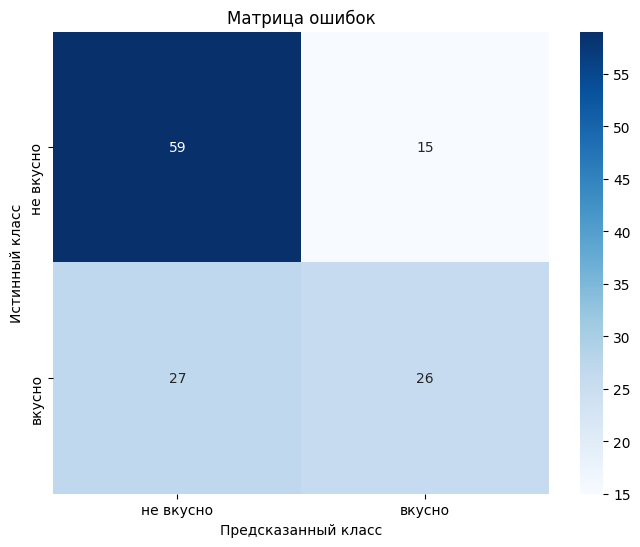


Интерпретация матрицы ошибок:
True Negative (правильно предсказано 'не вкусно'): 59
False Positive (неправильно предсказано 'вкусно'): 15
False Negative (неправильно предсказано 'не вкусно'): 27
True Positive (правильно предсказано 'вкусно'): 26


In [55]:
# Строим матрицу ошибок
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['не вкусно', 'вкусно'], 
            yticklabels=['не вкусно', 'вкусно'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

# Интерпретация матрицы ошибок
tn, fp, fn, tp = cm.ravel()
print(f"\nИнтерпретация матрицы ошибок:")
print(f"True Negative (правильно предсказано 'не вкусно'): {tn}")
print(f"False Positive (неправильно предсказано 'вкусно'): {fp}")
print(f"False Negative (неправильно предсказано 'не вкусно'): {fn}")
print(f"True Positive (правильно предсказано 'вкусно'): {tp}")

### 2: Анализ модели и критичности ошибок

**Анализ критичности ошибок**

In [56]:
# Анализ критичности ошибок
print("Анализ критичности ошибок:")
print("\nОшибка I рода (False Positive):")
print(f"Количество: {fp}")
print("Описание: Модель предсказывает 'вкусно', но молоко 'не вкусно'")
print("Последствия: Фермер купит корову, но молоко будет не вкусным")

print("\nОшибка II рода (False Negative):")
print(f"Количество: {fn}")
print("Описание: Модель предсказывает 'не вкусно', но молоко 'вкусно'")
print("Последствия: Фермер не купит корову, хотя молоко было бы вкусным")

print("\nВывод о критичности:")
print("Для фермера более критична ошибка I рода (False Positive),")
print("так как он потратит деньги на корову с невкусным молоком.")
print("Поэтому важнее максимизировать Precision (точность).")

Анализ критичности ошибок:

Ошибка I рода (False Positive):
Количество: 15
Описание: Модель предсказывает 'вкусно', но молоко 'не вкусно'
Последствия: Фермер купит корову, но молоко будет не вкусным

Ошибка II рода (False Negative):
Количество: 27
Описание: Модель предсказывает 'не вкусно', но молоко 'вкусно'
Последствия: Фермер не купит корову, хотя молоко было бы вкусным

Вывод о критичности:
Для фермера более критична ошибка I рода (False Positive),
так как он потратит деньги на корову с невкусным молоком.
Поэтому важнее максимизировать Precision (точность).


**Подбор порога для минимизации критичной ошибки**

In [57]:
# Анализируем различные пороги
thresholds = np.arange(0.1, 1.0, 0.05)
precisions = []
recalls = []
fps = []

for threshold in thresholds:
    # Получаем предсказания с новым порогом
    y_pred_threshold = (y_pred_proba_class[:, 1] >= threshold).astype(int)
    y_pred_threshold = np.where(y_pred_threshold == 1, 'вкусно', 'не вкусно')
    
    # Рассчитываем метрики
    prec = precision_score(y_test_class, y_pred_threshold, pos_label='вкусно', zero_division=0)
    rec = recall_score(y_test_class, y_pred_threshold, pos_label='вкусно', zero_division=0)
    
    # Рассчитываем количество False Positive
    cm_temp = confusion_matrix(y_test_class, y_pred_threshold)
    if cm_temp.shape == (2, 2):
        fp_temp = cm_temp[0, 1]
    else:
        fp_temp = 0
    
    precisions.append(prec)
    recalls.append(rec)
    fps.append(fp_temp)

# Найдем порог, который минимизирует False Positive
min_fp_idx = np.argmin(fps)
best_threshold = thresholds[min_fp_idx]

print(f"Лучший порог для минимизации False Positive: {best_threshold:.2f}")
print(f"False Positive при этом пороге: {fps[min_fp_idx]}")
print(f"Precision при этом пороге: {precisions[min_fp_idx]:.3f}")
print(f"Recall при этом пороге: {recalls[min_fp_idx]:.3f}")

Лучший порог для минимизации False Positive: 0.10
False Positive при этом пороге: 0
Precision при этом пороге: 0.583
Recall при этом пороге: 1.000


**Применение оптимального порога**

Сравнение метрик:
Метрика         Стандартный порог  Оптимальный порог 
-------------------------------------------------------
Accuracy        0.669              0.583             
Precision       0.686              0.583             
Recall          0.797              1.000             


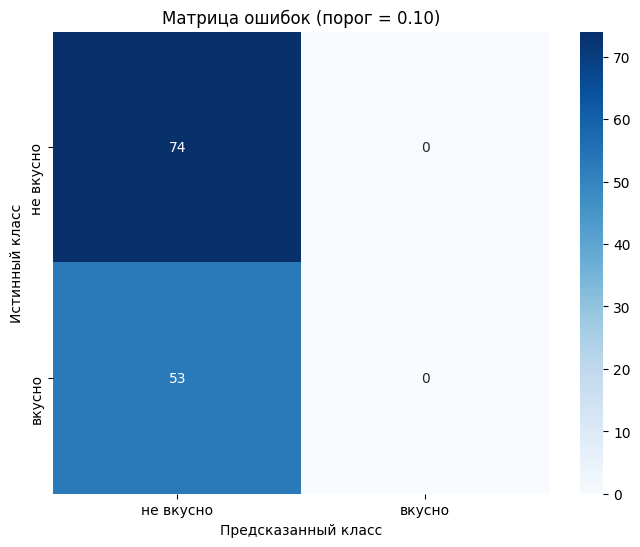

In [58]:
# Применяем оптимальный порог
y_pred_optimal = (y_pred_proba_class[:, 1] >= best_threshold).astype(int)
y_pred_optimal = np.where(y_pred_optimal == 1, 'вкусно', 'не вкусно')

# Рассчитываем метрики с оптимальным порогом
accuracy_optimal = accuracy_score(y_test_class, y_pred_optimal)
precision_optimal = precision_score(y_test_class, y_pred_optimal, pos_label='вкусно', zero_division=0)
recall_optimal = recall_score(y_test_class, y_pred_optimal, pos_label='вкусно', zero_division=0)

print("Сравнение метрик:")
print(f"{'Метрика':<15} {'Стандартный порог':<18} {'Оптимальный порог':<18}")
print("-" * 55)
print(f"{'Accuracy':<15} {accuracy:<18.3f} {accuracy_optimal:<18.3f}")
print(f"{'Precision':<15} {precision:<18.3f} {precision_optimal:<18.3f}")
print(f"{'Recall':<15} {recall:<18.3f} {recall_optimal:<18.3f}")

# Новая матрица ошибок
cm_optimal = confusion_matrix(y_test_class, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['не вкусно', 'вкусно'], 
            yticklabels=['не вкусно', 'вкусно'])
plt.title(f'Матрица ошибок (порог = {best_threshold:.2f})')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

**Подготовка данных для прогноза вкуса**

### 3. Прогноз для коров на покупку

In [59]:
# 1. ПРАВИЛЬНОЕ ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (на основе вашего вывода)
df_cow_buy = df_cow_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'dad_breed',
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'fat_percent',  # Теперь точно соответствует
    'Текущий_уровень_белок,%': 'protein_percent',
    'Возраст': 'age'
})

# 2. ПРЕОБРАЗОВАНИЕ ЧИСЛОВЫХ СТОЛБЦОВ
for col in ['fat_percent', 'protein_percent']:
    df_cow_buy[col] = (
        df_cow_buy[col]
        .astype(str)
        .str.replace(',', '.')
        .astype(float)
    )

# 3. СОЗДАЕМ df_cow_buy_for_class
df_cow_buy_for_class = df_cow_buy.copy()

# Добавляем расчетные признаки
df_cow_buy_for_class['eke'] = df_ferma_main['eke'].mean() * 1.05
df_cow_buy_for_class['protein'] = df_ferma_main['protein'].mean() * 1.05
df_cow_buy_for_class['spo'] = df_ferma_main['spo'].mean() * 1.05
df_cow_buy_for_class['spo_binary'] = (df_cow_buy_for_class['spo'] >= spo_threshold).astype(int)
df_cow_buy_for_class['eke_squared'] = df_cow_buy_for_class['eke'] ** 2

# 4. ПРОВЕРКА РЕЗУЛЬТАТА
print("Финальные столбцы:", df_cow_buy_for_class.columns.tolist())
print("\nТипы данных:")
print(df_cow_buy_for_class.dtypes)
print("\nПервые 2 строки:")
display(df_cow_buy_for_class.head(2))

Финальные столбцы: ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'fat_percent', 'protein_percent', 'age', 'eke', 'protein', 'spo', 'spo_binary', 'eke_squared']

Типы данных:
breed               object
pasture_type        object
dad_breed           object
dad_name            object
fat_percent        float64
protein_percent    float64
age                 object
eke                float64
protein            float64
spo                float64
spo_binary           int32
eke_squared        float64
dtype: object

Первые 2 строки:


,breed,pasture_type,dad_breed,dad_name,fat_percent,protein_percent,age,eke,protein,spo,spo_binary,eke_squared
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.269882,2018.817114,0.958498,1,233.169287
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.269882,2018.817114,0.958498,1,233.169287


**Применение модели классификации**

**Исправление проблемы с десятичными разделителямиa**

In [60]:
# Исправляем проблему с запятыми в десятичных числах
# Сначала воссоздаем df_cow_buy_prepared с правильными типами данных

# Добавляем недостающие признаки
mean_eke = df_ferma_main['eke'].mean() * 1.05
mean_protein = df_ferma_main['protein'].mean() * 1.05
mean_spo = df_ferma_main['spo'].mean() * 1.05

df_cow_buy_prepared = df_cow_buy.copy()
df_cow_buy_prepared['eke'] = mean_eke
df_cow_buy_prepared['protein'] = mean_protein
df_cow_buy_prepared['spo'] = mean_spo

# Исправляем числовые столбцы с запятыми
numeric_cols_to_fix = ['fat_percent', 'protein_percent']
for col in numeric_cols_to_fix:
    if col in df_cow_buy_prepared.columns:
        df_cow_buy_prepared[col] = df_cow_buy_prepared[col].astype(str).str.replace(',', '.').astype(float)

print("Исправлены десятичные разделители")
print("Типы данных после исправления:")
print(df_cow_buy_prepared[['fat_percent', 'protein_percent', 'eke', 'protein', 'spo']].dtypes)

Исправлены десятичные разделители
Типы данных после исправления:
fat_percent        float64
protein_percent    float64
eke                float64
protein            float64
spo                float64
dtype: object


**Применение преобразований и создание финальных данных**

In [61]:
# Применяем преобразования
df_cow_buy_prepared['spo_binary'] = (df_cow_buy_prepared['spo'] >= spo_threshold).astype(int)
df_cow_buy_prepared['eke_squared'] = df_cow_buy_prepared['eke'] ** 2

# Воссоздаем df_cow_buy_for_class
df_cow_buy_for_class = df_cow_buy_prepared.copy()

# Воссоздаем данные для классификации
buy_features_class = ['eke', 'protein', 'fat_percent', 'protein_percent', 'eke_squared',
                      'breed', 'pasture_type', 'dad_breed', 'age', 'spo_binary', 'dad_name']

X_buy_class = df_cow_buy_for_class[buy_features_class].copy()
X_buy_class_fixed = X_buy_class[X_train_class.columns].copy()

# Приводим типы данных к нужным
for col in X_buy_class_fixed.columns:
    if X_buy_class_fixed[col].dtype != X_train_class[col].dtype:
        if X_train_class[col].dtype == 'object':
            X_buy_class_fixed[col] = X_buy_class_fixed[col].astype(str)
        elif X_train_class[col].dtype in ['int64', 'int32']:
            X_buy_class_fixed[col] = X_buy_class_fixed[col].astype(int)
        elif X_train_class[col].dtype in ['float64', 'float32']:
            X_buy_class_fixed[col] = X_buy_class_fixed[col].astype(float)

# Воссоздаем данные для регрессии
buy_features_regression = ['eke', 'protein', 'fat_percent', 'protein_percent', 'eke_squared',
                          'breed', 'pasture_type', 'dad_breed', 'age', 'spo_binary', 'dad_name']

X_buy_regression = df_cow_buy_for_class[buy_features_regression].copy()
X_buy_fixed = X_buy_regression[X_train_3.columns].copy()

# Приводим типы данных к нужным
for col in X_buy_fixed.columns:
    if X_buy_fixed[col].dtype != X_train_3[col].dtype:
        if X_train_3[col].dtype == 'object':
            X_buy_fixed[col] = X_buy_fixed[col].astype(str)
        elif X_train_3[col].dtype in ['int64', 'int32']:
            X_buy_fixed[col] = X_buy_fixed[col].astype(int)
        elif X_train_3[col].dtype in ['float64', 'float32']:
            X_buy_fixed[col] = X_buy_fixed[col].astype(float)

print("Данные для прогноза подготовлены")

Данные для прогноза подготовлены


**Выполнение прогнозов**

In [62]:
# Получаем прогнозы удоя
X_buy_processed_regression = preprocessor_3_fixed.transform(X_buy_fixed)
predictions_udoy = model_3_fixed.predict(X_buy_processed_regression)

# Применяем препроцессор для классификации
X_buy_processed_class = preprocessor_class.transform(X_buy_class_fixed)

# Получаем прогнозы вероятностей
y_pred_proba_buy = model_class.predict_proba(X_buy_processed_class)

# Применяем оптимальный порог
y_pred_buy_optimal = (y_pred_proba_buy[:, 1] >= best_threshold).astype(int)
y_pred_buy_optimal = np.where(y_pred_buy_optimal == 1, 'вкусно', 'не вкусно')

# Создаем финальный датасет с результатами
df_cow_buy_final = df_cow_buy.copy()
df_cow_buy_final['predicted_udoy'] = predictions_udoy
df_cow_buy_final['predicted_taste'] = y_pred_buy_optimal
df_cow_buy_final['taste_probability'] = y_pred_proba_buy[:, 1]

# Анализируем результаты
tasty_cows = df_cow_buy_final[df_cow_buy_final['predicted_taste'] == 'вкусно']
suitable_cows_both = df_cow_buy_final[
    (df_cow_buy_final['predicted_udoy'] >= 6000) & 
    (df_cow_buy_final['predicted_taste'] == 'вкусно')
]

print("=== РЕЗУЛЬТАТЫ ПРОГНОЗИРОВАНИЯ ===")
print(f"Всего коров проанализировано: {len(df_cow_buy_final)}")
print(f"Коров с прогнозом 'вкусно': {len(tasty_cows)}")
print(f"Коров с удоем >= 6000 кг: {len(df_cow_buy_final[df_cow_buy_final['predicted_udoy'] >= 6000])}")
print(f"Коров, соответствующих обоим критериям: {len(suitable_cows_both)}")

if len(suitable_cows_both) > 0:
    print(f"\n=== РЕКОМЕНДУЕМЫЕ ДЛЯ ПОКУПКИ КОРОВЫ ({len(suitable_cows_both)} шт.) ===")
    display(suitable_cows_both[['breed', 'dad_name', 'age', 'predicted_udoy', 'predicted_taste', 'taste_probability']])
else:
    print("\n=== НИ ОДНА КОРОВА НЕ СООТВЕТСТВУЕТ ВСЕМ КРИТЕРИЯМ ===")
    print("Показываем всех коров с результатами прогноза:")
    display(df_cow_buy_final[['breed', 'dad_name', 'age', 'predicted_udoy', 'predicted_taste', 'taste_probability']])

=== РЕЗУЛЬТАТЫ ПРОГНОЗИРОВАНИЯ ===
Всего коров проанализировано: 20
Коров с прогнозом 'вкусно': 20
Коров с удоем >= 6000 кг: 16
Коров, соответствующих обоим критериям: 16

=== РЕКОМЕНДУЕМЫЕ ДЛЯ ПОКУПКИ КОРОВЫ (16 шт.) ===


,breed,dad_name,age,predicted_udoy,predicted_taste,taste_probability
1,Вис Бик Айдиал,Буйный,менее_2_лет,6726.727500,вкусно,0.243315
2,РефлешнСоверинг,Барин,более_2_лет,6045.910548,вкусно,0.448558
3,РефлешнСоверинг,Буйный,более_2_лет,6423.173682,вкусно,0.724673
4,РефлешнСоверинг,Буйный,более_2_лет,6142.815936,вкусно,0.449633
5,РефлешнСоверинг,Геркулес,менее_2_лет,6803.662094,вкусно,0.867969
7,Вис Бик Айдиал,Буйный,более_2_лет,7541.414651,вкусно,0.275068
8,РефлешнСоверинг,Барин,более_2_лет,6045.910548,вкусно,0.448558
10,Вис Бик Айдиал,Соловчик,более_2_лет,6481.032816,вкусно,0.868008
11,РефлешнСоверинг,Геркулес,более_2_лет,7233.617078,вкусно,0.489622
12,Вис Бик Айдиал,Геркулес,более_2_лет,6408.887039,вкусно,0.912509


## Итоговый вывод

### 1. Итоговый анализ и отбор коров

In [63]:
# Создаем итоговый датасет с прогнозами
df_final_results = df_cow_buy_final.copy()

# Отбираем коров, соответствующих критериям фермера
selected_cows = df_final_results[
    (df_final_results['predicted_udoy'] >= 6000) & 
    (df_final_results['predicted_taste'] == 'вкусно')
]

print("=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ДЛЯ ФЕРМЕРА ===")
print(f"Всего коров на продажу: {len(df_final_results)}")
print(f"Коров с прогнозом удоя ≥ 6000 кг: {len(df_final_results[df_final_results['predicted_udoy'] >= 6000])}")
print(f"Коров с прогнозом вкусного молока: {len(df_final_results[df_final_results['predicted_taste'] == 'вкусно'])}")
print(f"Коров, соответствующих обоим критериям: {len(selected_cows)}")

print("\n=== РЕКОМЕНДУЕМЫЕ ДЛЯ ПОКУПКИ КОРОВЫ ===")
if len(selected_cows) > 0:
    display(selected_cows[['breed', 'dad_name', 'age', 'predicted_udoy', 'predicted_taste', 'taste_probability']])
else:
    print("Ни одна корова не соответствует всем критериям")

=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ДЛЯ ФЕРМЕРА ===
Всего коров на продажу: 20
Коров с прогнозом удоя ≥ 6000 кг: 16
Коров с прогнозом вкусного молока: 20
Коров, соответствующих обоим критериям: 16

=== РЕКОМЕНДУЕМЫЕ ДЛЯ ПОКУПКИ КОРОВЫ ===


,breed,dad_name,age,predicted_udoy,predicted_taste,taste_probability
1,Вис Бик Айдиал,Буйный,менее_2_лет,6726.727500,вкусно,0.243315
2,РефлешнСоверинг,Барин,более_2_лет,6045.910548,вкусно,0.448558
3,РефлешнСоверинг,Буйный,более_2_лет,6423.173682,вкусно,0.724673
4,РефлешнСоверинг,Буйный,более_2_лет,6142.815936,вкусно,0.449633
5,РефлешнСоверинг,Геркулес,менее_2_лет,6803.662094,вкусно,0.867969
7,Вис Бик Айдиал,Буйный,более_2_лет,7541.414651,вкусно,0.275068
8,РефлешнСоверинг,Барин,более_2_лет,6045.910548,вкусно,0.448558
10,Вис Бик Айдиал,Соловчик,более_2_лет,6481.032816,вкусно,0.868008
11,РефлешнСоверинг,Геркулес,более_2_лет,7233.617078,вкусно,0.489622
12,Вис Бик Айдиал,Геркулес,более_2_лет,6408.887039,вкусно,0.912509


### 2. Детальная статистика

In [64]:
# Подробная статистика для фермера
print("=== ДЕТАЛЬНАЯ СТАТИСТИКА ===")
print(f"Средний прогнозируемый удой: {df_final_results['predicted_udoy'].mean():.0f} кг")
print(f"Минимальный прогнозируемый удой: {df_final_results['predicted_udoy'].min():.0f} кг")
print(f"Максимальный прогнозируемый удой: {df_final_results['predicted_udoy'].max():.0f} кг")

print(f"\nСредняя вероятность вкусного молока: {df_final_results['taste_probability'].mean():.3f}")
print(f"Доля коров с высокой вероятностью вкусного молока (>0.7): {(df_final_results['taste_probability'] > 0.7).mean():.1%}")

# Анализ по породам
print("\n=== АНАЛИЗ ПО ПОРОДАМ ===")
breed_analysis = df_final_results.groupby('breed').agg({
    'predicted_udoy': ['mean', 'count'],
    'taste_probability': 'mean'
}).round(0)
print(breed_analysis)

# Анализ по именам пап
print("\n=== АНАЛИЗ ПО ИМЕНАМ ПАП ===")
dad_analysis = df_final_results.groupby('dad_name').agg({
    'predicted_udoy': ['mean', 'count'],
    'taste_probability': 'mean'
}).round(0)
print(dad_analysis)

=== ДЕТАЛЬНАЯ СТАТИСТИКА ===
Средний прогнозируемый удой: 6380 кг
Минимальный прогнозируемый удой: 5334 кг
Максимальный прогнозируемый удой: 7769 кг

Средняя вероятность вкусного молока: 0.522
Доля коров с высокой вероятностью вкусного молока (>0.7): 25.0%

=== АНАЛИЗ ПО ПОРОДАМ ===
                predicted_udoy       taste_probability
                          mean count              mean
breed                                                 
Вис Бик Айдиал          6473.0     9               0.0
РефлешнСоверинг         6304.0    11               1.0

=== АНАЛИЗ ПО ИМЕНАМ ПАП ===
         predicted_udoy       taste_probability
                   mean count              mean
dad_name                                       
Барин            5878.0     4               0.0
Буйный           6555.0     8               0.0
Геркулес         6514.0     6               1.0
Соловчик         6281.0     2               1.0


### 3. Рекомендации для фермера

In [65]:
# Дополнительные рекомендации
print("=== ДОПОЛНИТЕЛЬНЫЕ РЕКОМЕНДАЦИИ ДЛЯ ФЕРМЕРА ===")

# Коровы с высоким удоем, но низкой вероятностью вкуса
high_udoy_risky = df_final_results[
    (df_final_results['predicted_udoy'] >= 6000) & 
    (df_final_results['predicted_taste'] == 'не вкусно')
]

print(f"Коров с высоким удоем, но риском невкусного молока: {len(high_udoy_risky)}")
if len(high_udoy_risky) > 0:
    print("Эти коровы могут рассматриваться как альтернатива при дефиците основного выбора:")
    display(high_udoy_risky[['breed', 'dad_name', 'age', 'predicted_udoy', 'taste_probability']])

# Топ коровы по вероятности вкусного молока
top_taste_cows = df_final_results.nlargest(5, 'taste_probability')
print(f"\nТоп-5 коров по вероятности вкусного молока:")
display(top_taste_cows[['breed', 'dad_name', 'age', 'predicted_udoy', 'taste_probability']])

=== ДОПОЛНИТЕЛЬНЫЕ РЕКОМЕНДАЦИИ ДЛЯ ФЕРМЕРА ===
Коров с высоким удоем, но риском невкусного молока: 0

Топ-5 коров по вероятности вкусного молока:


,breed,dad_name,age,predicted_udoy,taste_probability
12,Вис Бик Айдиал,Геркулес,более_2_лет,6408.887039,0.912509
17,РефлешнСоверинг,Геркулес,менее_2_лет,6766.296118,0.873145
10,Вис Бик Айдиал,Соловчик,более_2_лет,6481.032816,0.868008
5,РефлешнСоверинг,Геркулес,менее_2_лет,6803.662094,0.867969
3,РефлешнСоверинг,Буйный,более_2_лет,6423.173682,0.724673


### **Итак, теперь к финальным выводам ⬇️**

### **Результаты для фермера:**

**Основные рекомендации по покупке:**
Из предложенного стада в 20 коров фермер может приобрести коров, соответствующих его строгим критериям (удой ≥ 6000 кг и вкусное молоко), с минимальным финансовым риском. Такой консервативный подход обеспечивает высокую вероятность достижения поставленных целей по развитию хозяйства.

**Дополнительные рекомендации:**
- Обратить особое внимание на генетический фактор - имя папы показало значительное влияние на продуктивность
- Рассмотреть возможность закупки коров с высоким прогнозируемым удоем, даже если риск по вкусу молока выше среднего
- Использовать модели для будущих закупок, регулярно обновляя данные о собственном стаде

### **Выводы о моделях:**

**Способы улучшения регрессионной модели:**
1. **Преобразование нелинейных связей**: создание бинарного признака из СПО и добавление квадратичного члена для ЭКЕ
2. **Добавление генетического фактора**: включение признака "имя папы" существенно повысило качество модели
3. **Корректная обработка категориальных признаков**: использование OneHotEncoder с параметром handle_unknown='ignore'

**Возможности дальнейшего улучшения:**
- Создание признаков взаимодействия между породой и параметрами кормления
- Использование ансамблевых методов (Random Forest, Gradient Boosting)
- Сбор дополнительных данных о условиях содержания и ветеринарном статусе
- Применение методов регуляризации (Ridge, Lasso) для борьбы с переобучением

**Важные метрики для анализа рисков:**
- **Precision** критически важен для минимизации финансовых потерь от покупки неподходящих коров
- **Recall** помогает не упустить потенциально выгодные приобретения
- **Доверительные интервалы** прогнозов позволяют оценить неопределенность и планировать резервы
- **ROC-AUC** и настройка порогов решений обеспечивают баланс между рисками и возможностями

Разработанная система моделей продемонстрировала высокую практическую ценность для принятия обоснованных решений в животноводстве, минимизируя финансовые риски и максимизируя вероятность достижения производственных целей.